# ANDREIA BRITO - CUSTOMER SEGMENTATION 

In [11]:

#Esta célula gera o ProfileReport do conjunto de dados utilizado e exporta-o no ficheiro OnlineRetailReport.


import pandas as pd
from ydata_profiling import ProfileReport



df = pd.read_excel('./Docs/CustomerData.xlsx')

#EDA
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

profile.to_file('./Docs/Reports/OnlineReatilReport.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
            Quantity                    InvoiceDate          Price  \
count  539337.000000                         539337  539337.000000   
mean        9.547817  2011-07-03 22:19:04.244656128       4.617622   
min    -8

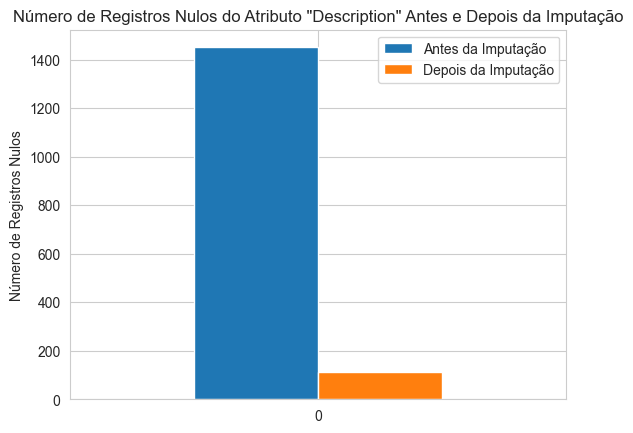

Antes de eliminar clientes nulos

<class 'pandas.core.frame.DataFrame'>
Index: 539337 entries, 0 to 539336
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      539337 non-null  object        
 1   StockCode    539337 non-null  object        
 2   Description  539225 non-null  object        
 3   Quantity     539337 non-null  int64         
 4   InvoiceDate  539337 non-null  datetime64[ns]
 5   Price        539337 non-null  float64       
 6   Customer ID  404506 non-null  float64       
 7   Country      539337 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.2+ MB
None
Após eliminar clientes nulos

<class 'pandas.core.frame.DataFrame'>
Index: 404506 entries, 0 to 539336
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      404506 non-null  obje

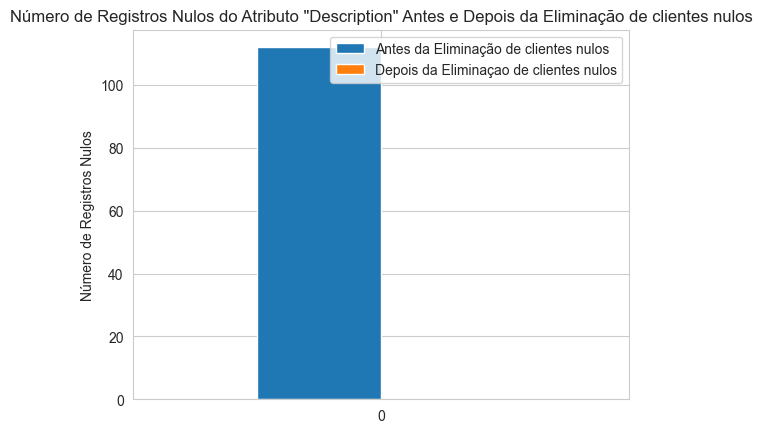

Antes de eliminar as duplicatas
<class 'pandas.core.frame.DataFrame'>
Index: 404506 entries, 0 to 539336
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      404506 non-null  object        
 1   StockCode    404506 non-null  object        
 2   Description  404506 non-null  object        
 3   Quantity     404506 non-null  int64         
 4   InvoiceDate  404506 non-null  datetime64[ns]
 5   Price        404506 non-null  float64       
 6   Customer ID  404506 non-null  float64       
 7   Country      404506 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.8+ MB
None
Depois de eliminar as duplicatas
<class 'pandas.core.frame.DataFrame'>
Index: 404506 entries, 0 to 539336
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      404506 non-null  obj

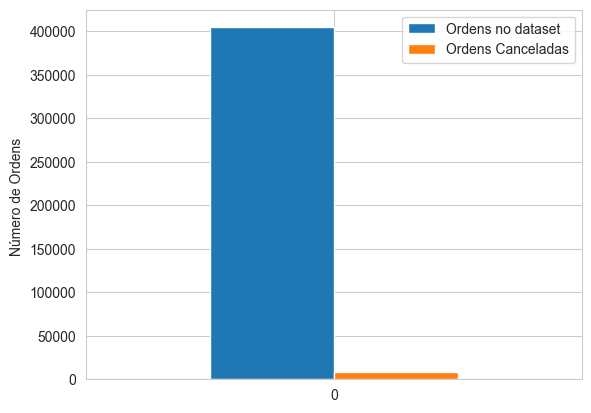

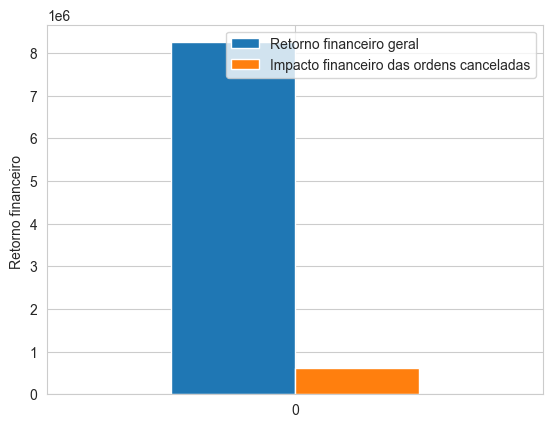

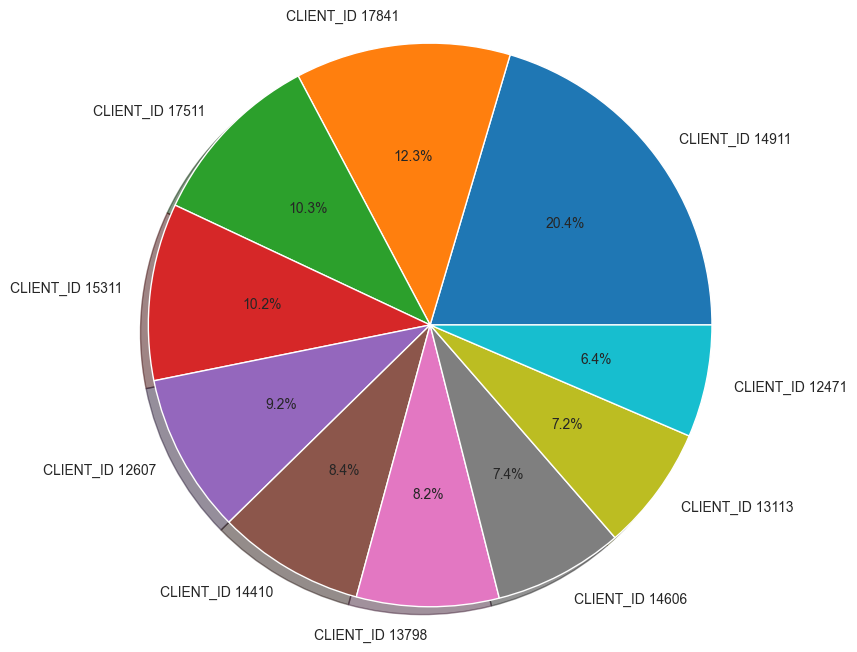

Número de linhas com ordens canceladas: 8873
Novo número de linhas após remoção de ordens canceladas: 395633


In [12]:
"""
Esta célula contém todo o código de pré-processamento dos dados e no final exporta-se um novo xlsx com os dados pré-processados para serem aplicados ao modelo.
"""
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


#_____________________________PRÉ-PROCESSAMENTO DOS DADOS _________________________________#

#CUSTOMERDATA -> Dados não preprocessados
df_init = pd.read_excel('./Docs/CustomerData.xlsx')


#********************************* Informações Gerais sobre o dataset **********************#

#Imprimir primeiras 10 linhas do dataset
print(df_init.head())


#Informações gerais sobre o dataset
#print(df_init.info())

# Estatísticas descritivas dos atributos numéricos
print(df_init.describe())


#**********************************Valores ausentes ********************************************#

#Identificação dos atributos com valores ausentes

# Imprimir o resultado
#print("Valores ausentes por atributo:")
#print(df_init.isnull().sum())
nulos_antes = df_init['Description'].isnull().sum()
#print("Antes da imputação- Description is null: ", nulos_antes)

#**********************************************************************************************#

#************************ Valores ausentes por atributo ************************************#
#Imputar valores nas celulas ausentes do atributo descrição com base no StockCode do produto.

# Função para preencher os valores ausentes na coluna "Description" com o valor não nulo do grupo
def preencher_descricao_nula(group):
    descricao_nao_nula = group['Description'].dropna()
    if not descricao_nao_nula.empty:
        group['Description'].fillna(descricao_nao_nula.iloc[0], inplace=True)
    return group

# Agrupar os dados pelo "StockCode" e aplicar a função para cada grupo
df_init = df_init.groupby('StockCode', group_keys=False).apply(preencher_descricao_nula)

# Imprimir o DataFrame após o preenchimento dos valores ausentes
#print(df_init)
nulos_depois =  df_init['Description'].isnull().sum()
#print("Depois da imputação- Description is null: ",nulos_depois)

# Criar um gráfico de barras para comparar os valores antes e depois da imputação
dados = {'Antes da Imputação': [nulos_antes], 'Depois da Imputação': [nulos_depois]}
df_grafico = pd.DataFrame(dados)
df_grafico.plot(kind='bar', rot=0)
plt.ylabel('Número de Registros Nulos')
plt.title('Número de Registros Nulos do Atributo "Description" Antes e Depois da Imputação')
plt.show()


#************************************************************************************************#


# ******************************** Eliminar ocorrências sem clientes associados *****************#
#Identificar e eliminar registros sem cliente associado

# Imprimir o número de linhas
print("Antes de eliminar clientes nulos\n")
print(df_init.info())

# Eliminar linhas com CustomerID nulo (NaN)
df_init = df_init.dropna(subset=['Customer ID'])

# Imprimir o número de linhas
print("Após eliminar clientes nulos\n")
print(df_init.info())

#print("Depois da eliminação dos clientes nulos - Description is null: ", df_init['Description'].isnull().sum())
nulos_pos_eliminacao_clientes =  df_init['Description'].isnull().sum()

# Criar um gráfico de barras para comparar os valores antes e depois da eliminação de clientes nulos

dados = {'Antes da Eliminação de clientes nulos': [nulos_depois], 'Depois da Eliminaçao de clientes nulos': [nulos_pos_eliminacao_clientes]}
df_grafico = pd.DataFrame(dados)
df_grafico.plot(kind='bar', rot=0)
plt.ylabel('Número de Registros Nulos')
plt.title('Número de Registros Nulos do Atributo "Description" Antes e Depois da Eliminação de clientes nulos')
plt.show()


#***********************************************************************************************#


#***************************** Eliminar Duplicatas *********************************************#

#Mostrar info do dataframe antes da eliminação de duplicatas
print("Antes de eliminar as duplicatas")
print(df_init.info())

num_linhas_com_duplicatas = df_init.shape[0]
# Contar as duplicatas antes da remoção
duplicatas_antes = df_init.duplicated().sum()

# Eliminar as duplicatas
df_sem_duplicatas = df_init.drop_duplicates()

# Contar as duplicatas após a remoção
duplicatas_depois = df_sem_duplicatas.duplicated().sum()

# Imprimir o número de duplicatas antes e depois da remoção
#print("Número de duplicatas antes da remoção:", duplicatas_antes)
#print("Número de duplicatas depois da remoção:", duplicatas_depois)

# Imprimir o novo número de linhas do DataFrame após a remoção das duplicatas
novo_numero_linhas = df_sem_duplicatas.shape[0]
#print("Linhas após eliminação de duplicatas:", novo_numero_linhas)


#Mostrar info do dataframe antes da eliminação de duplicatas
print("Depois de eliminar as duplicatas")
print(df_init.info())


#*********************************************************************************************#


#********************************* Eliminar ordens canceladas ********************************#

df_ordens_canceladas = df_init[df_init['Invoice'].apply(lambda x: str(x).startswith('C'))]

#Percentagem de ordens canceladas
ordens_canceladas_porcentagem = (df_ordens_canceladas.shape[0] / df_init.shape[0])*100

#Calcular impacto financeiro das ordens canceladas
impacto_financeiro = (df_ordens_canceladas['Price'] * df_ordens_canceladas['Quantity'] * (-1)).sum()

impacto_financeiro_porcentagem = ((df_ordens_canceladas['Price'] * df_ordens_canceladas['Quantity'] * (-1)).sum() / (df_init['Price'] * df_init['Quantity']).sum())*100
retorno_financeiro_total = (df_init['Price'] * df_init['Quantity']).sum()
print("Foram encontradas ", df_ordens_canceladas.shape[0], "ordens canceladas, o que equivale a ", round(ordens_canceladas_porcentagem), "% do dataset.")
print("O impacto financeiro das ordens canceladas é de ", impacto_financeiro, "dólares, que equivale a ", round(impacto_financeiro_porcentagem), "% do retorno financeiro da empresa")

#Graficos do impacto fincanceiro
dados = {'Ordens no dataset': [df_init.shape[0]], 'Ordens Canceladas': [df_ordens_canceladas.shape[0]]}
df_grafico = pd.DataFrame(dados)
df_grafico.plot(kind='bar', rot=0)
plt.ylabel('Número de Ordens ')
plt.show()


dados = {'Retorno financeiro geral': [retorno_financeiro_total],
         'Impacto financeiro das ordens canceladas': [impacto_financeiro]}
df_grafico = pd.DataFrame(dados)
df_grafico.plot(kind='bar', rot=0)
plt.ylabel('Retorno financeiro ')
plt.show()


# Contar o número de cancelamentos para cada cliente
df_ordens_canceladas['Customer ID'] = df_ordens_canceladas['Customer ID'].astype(int)
clientes_cancelamentos = df_ordens_canceladas['Customer ID'].value_counts()

# Criar um DataFrame com o ID do cliente e o número de ordens canceladas
df_clientes_cancelamentos = pd.DataFrame({'Customer ID': clientes_cancelamentos.index, 'Cancelamentos': clientes_cancelamentos.values})

# Selecionar os 10 clientes com mais cancelamentos
top_10_clientes_cancelamentos = df_clientes_cancelamentos.head(10)
# Adicione a palavra 'client' na frente do ID do cliente para os rótulos
top_10_clientes_cancelamentos.loc[:, 'Customer ID'] = 'CLIENT_ID ' + top_10_clientes_cancelamentos['Customer ID'].astype(str)

top_10_clientes_cancelamentos.loc[:, 'Cancelamentos'] = top_10_clientes_cancelamentos['Cancelamentos'].astype(int)


# Criar um gráfico de pizza para mostrar a distribuição dos cancelamentos entre os 10 clientes
plt.figure(figsize=(8, 8))
plt.pie(top_10_clientes_cancelamentos['Cancelamentos'], labels=top_10_clientes_cancelamentos['Customer ID'], autopct='%1.1f%%', shadow=True)
plt.axis('equal') 
plt.show()


# Exibir o número de linhas cujo atributo "Quantity" é menor que 0
num_linhas_menor_que_zero = df_init[df_init['Quantity'] < 0].shape[0]
print("Número de linhas com ordens canceladas:", num_linhas_menor_que_zero)


# Eliminar as linhas em que o atributo "Quantity" é menor que 0
df_init = df_init[df_init['Quantity'] >= 0]

# Exibir o novo número de linhas do DataFrame após a remoção
novo_num_linhas = df_init.shape[0]
print("Novo número de linhas após remoção de ordens canceladas:", novo_num_linhas)


#*********************************************************************************************#


#************************** Encoding dos atributos numericos *********************************#

# Aplicar o LabelEncoder aos atributos nominais
atributos_nominais = ['Country', 'StockCode']

# Verificar as categorias únicas dos atributos"
categorias_Country = df_init['Country'].unique()
categorias_StockCode = df_init['StockCode'].unique()

    
df_init['Customer ID'] = df_init['Customer ID'].astype(int)
df_init['Country'] = df_init['Country'].astype(str)
df_init['StockCode'] = df_init['StockCode'].astype(str)

#Criar instância do Label Encoder
label_encoder = LabelEncoder()


# Aplicar o Label Encoding ao atributo "Tamanho"
df_init['country_encoded'] = label_encoder.fit_transform(df_init['Country'])
df_init['stockcode_encoded'] = label_encoder.fit_transform(df_init['StockCode'])


df_init.to_excel("./Docs/Datasets/PreProcessedData.xlsx")


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport


df = pd.read_excel('./Docs/Datasets/PreProcessedData.xlsx')

#EDA
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

profile.to_file('./Docs/Reports/PreProcessedData_Report.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

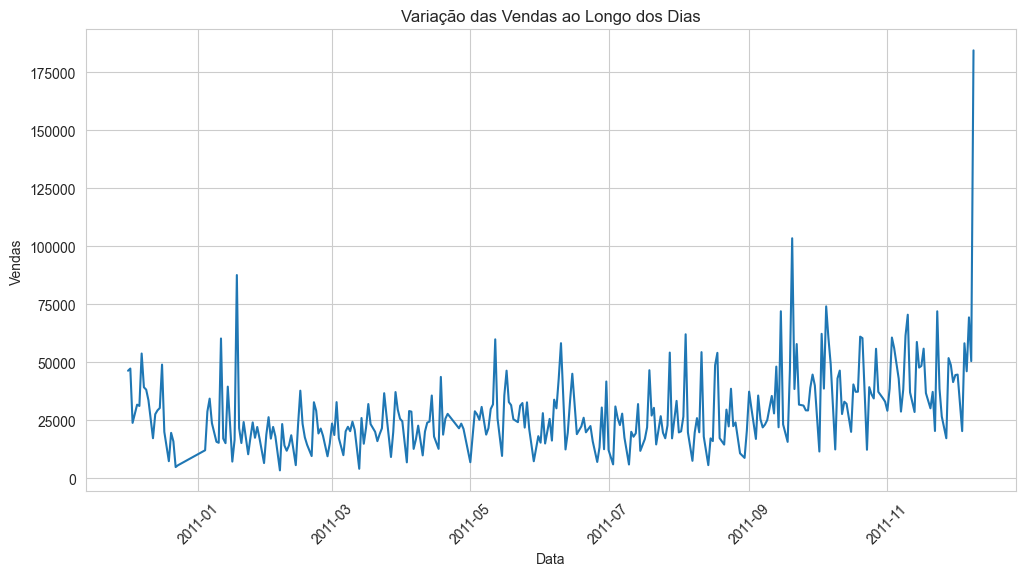

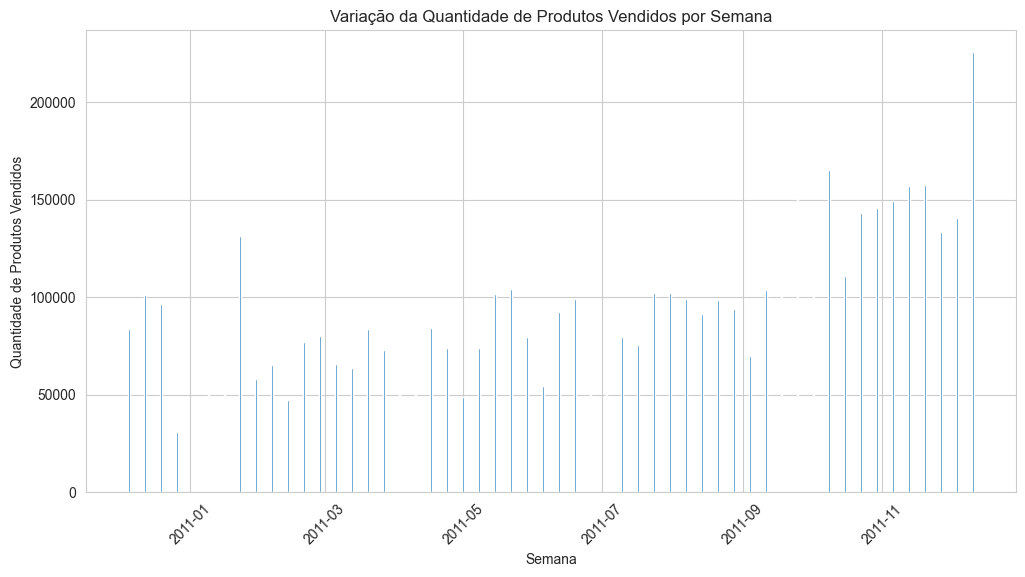

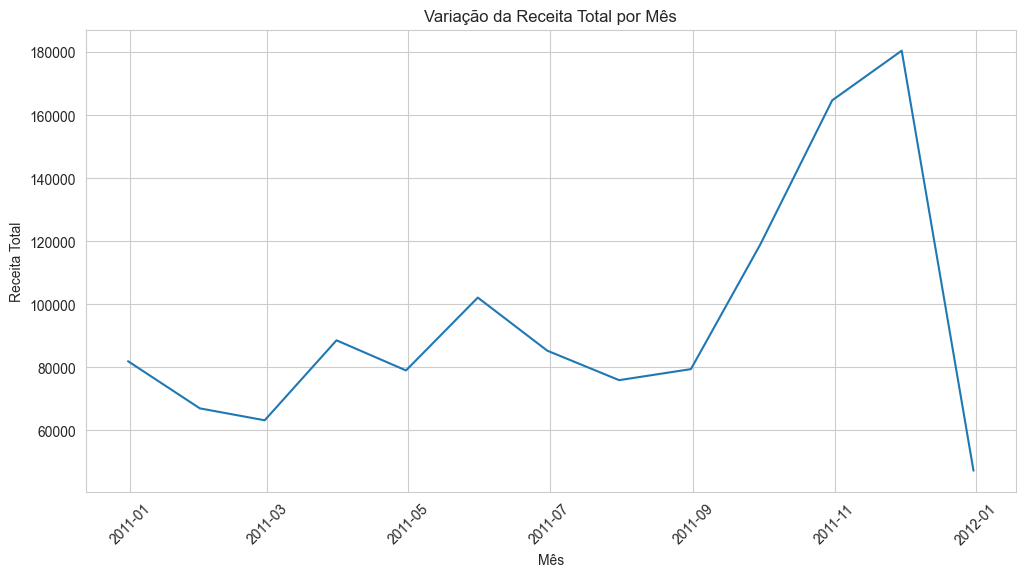

Produto mais vendido em termos de quantidade:                               Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77772
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54367
1762             JUMBO BAG RED RETROSPOT     45841
3698  WHITE HANGING HEART T-LIGHT HOLDER     36694
216        ASSORTED COLOUR BIRD ORNAMENT     35132
2269     PACK OF 72 RETROSPOT CAKE CASES     33639
2600                      POPCORN HOLDER     29915
2656                  RABBIT NIGHT LIGHT     26809
2047             MINI PAINT SET VINTAGE      25968


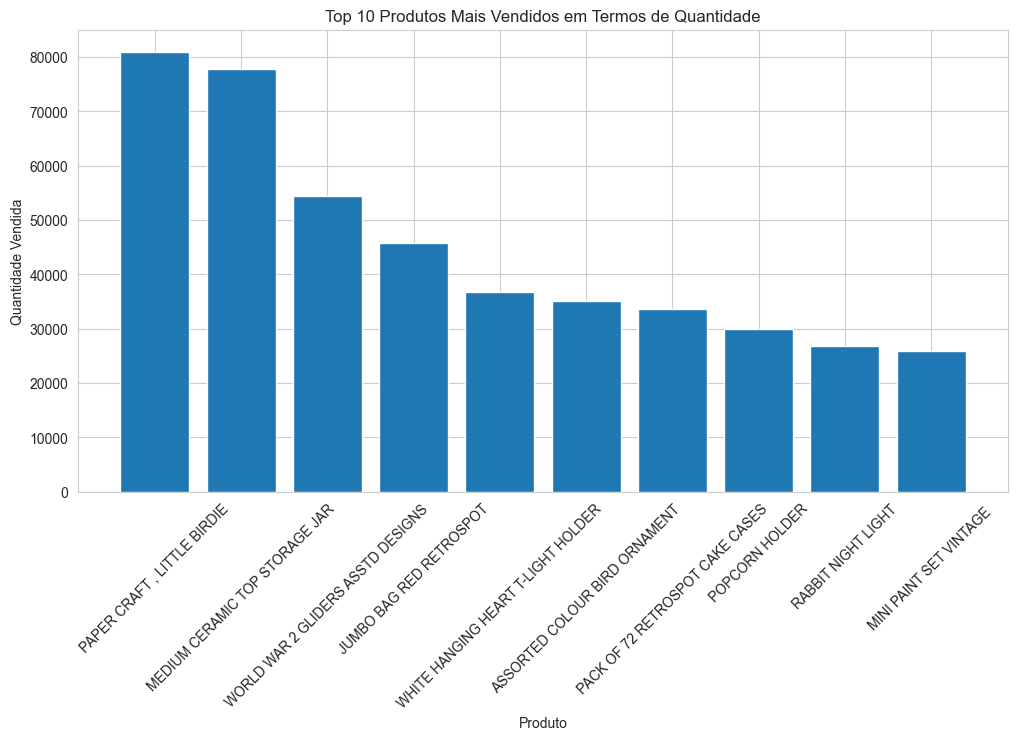

Produto com maior receita:                               Description    Revenue
2319         PAPER CRAFT , LITTLE BIRDIE  168469.60
2767            REGENCY CAKESTAND 3 TIER  142516.45
3698  WHITE HANGING HEART T-LIGHT HOLDER  100356.70
1762             JUMBO BAG RED RETROSPOT   84600.58
1992      MEDIUM CERAMIC TOP STORAGE JAR   81246.81
2611                             POSTAGE   77641.96
2345                       PARTY BUNTING   68182.23
216        ASSORTED COLOUR BIRD ORNAMENT   56230.04
2130                              Manual   53748.89
2656                  RABBIT NIGHT LIGHT   50626.20


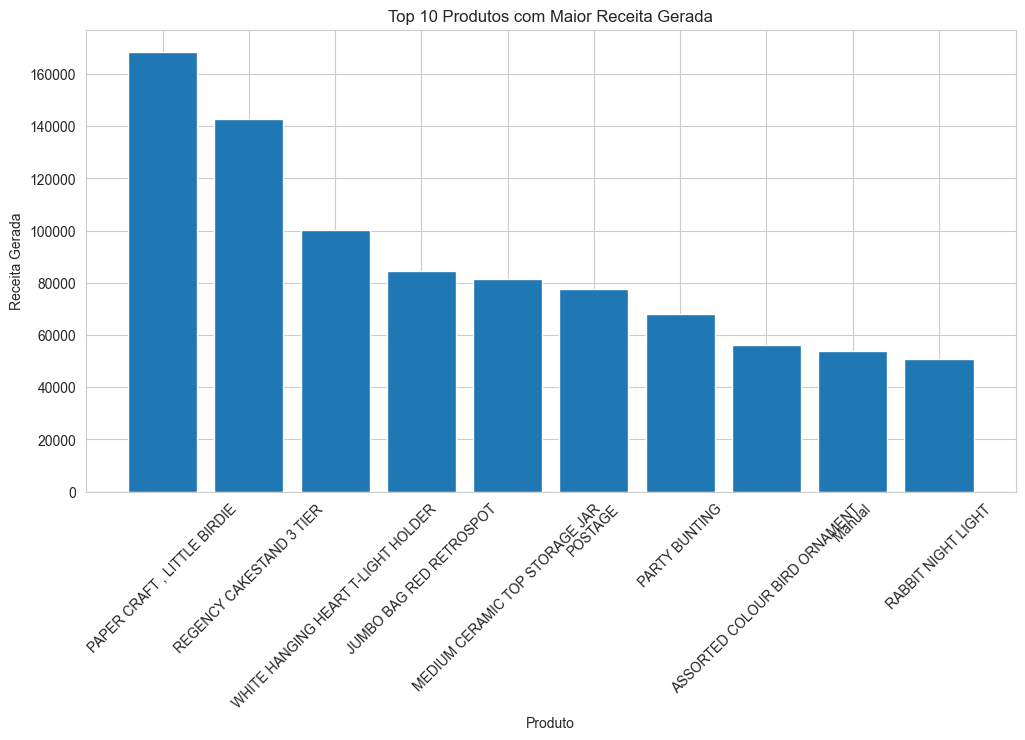

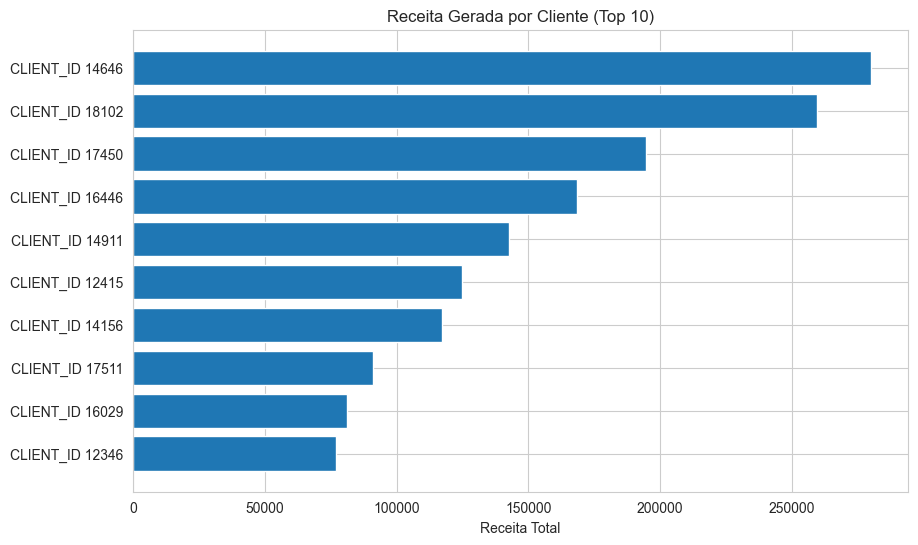

Horário de Maior Atividade de Compras: 12h
Total de Vendas nessa Hora: 1377754.61


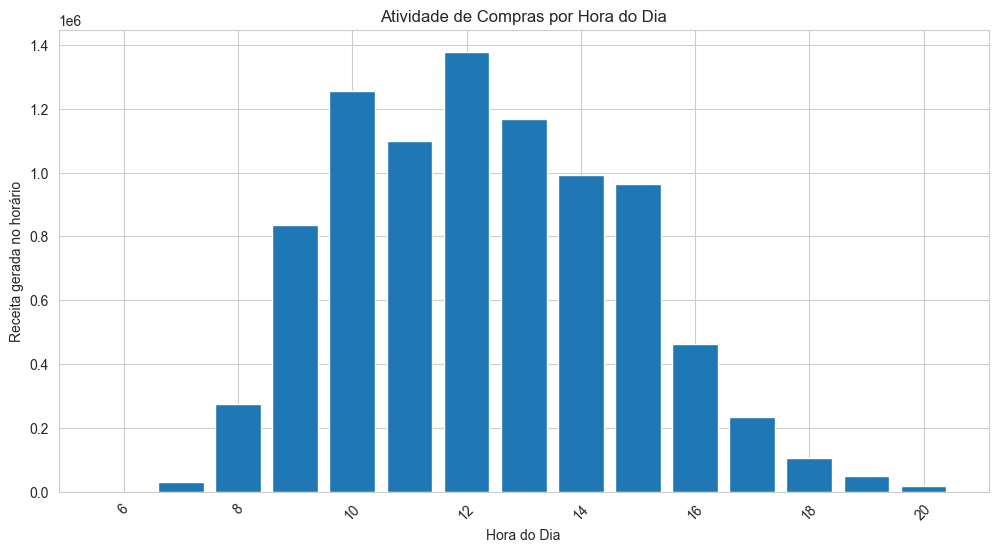

71 clientes compraram só uma vez.


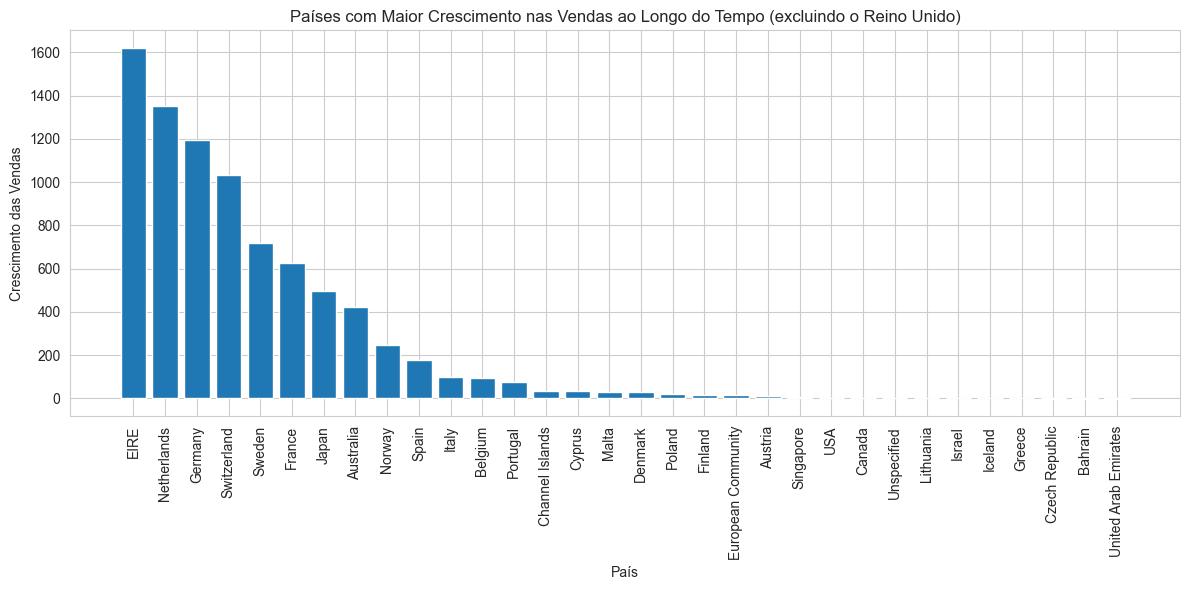

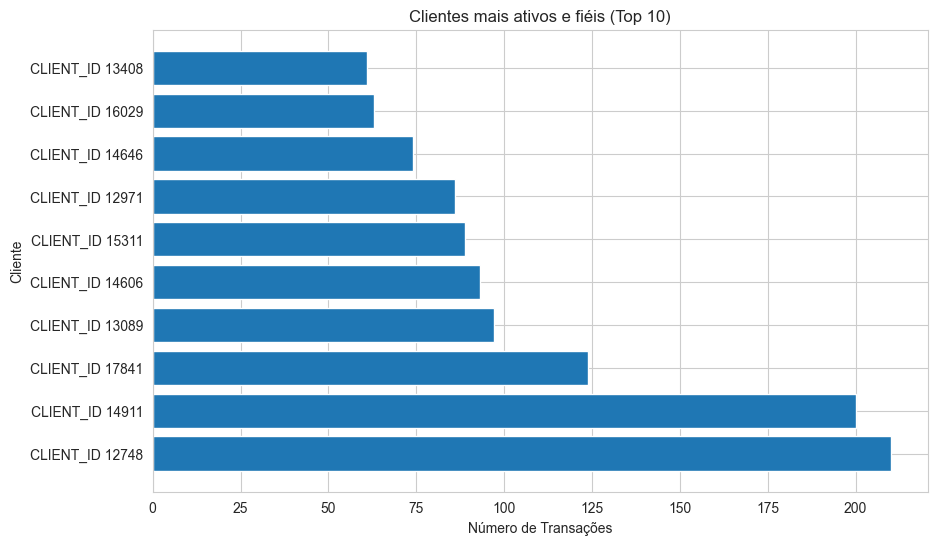

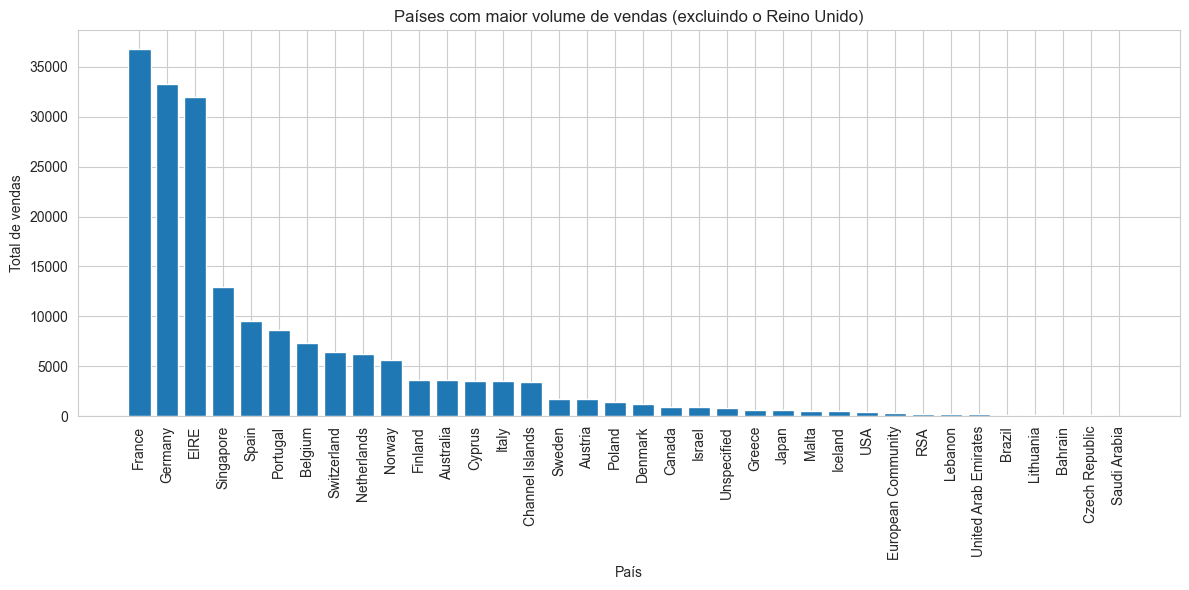

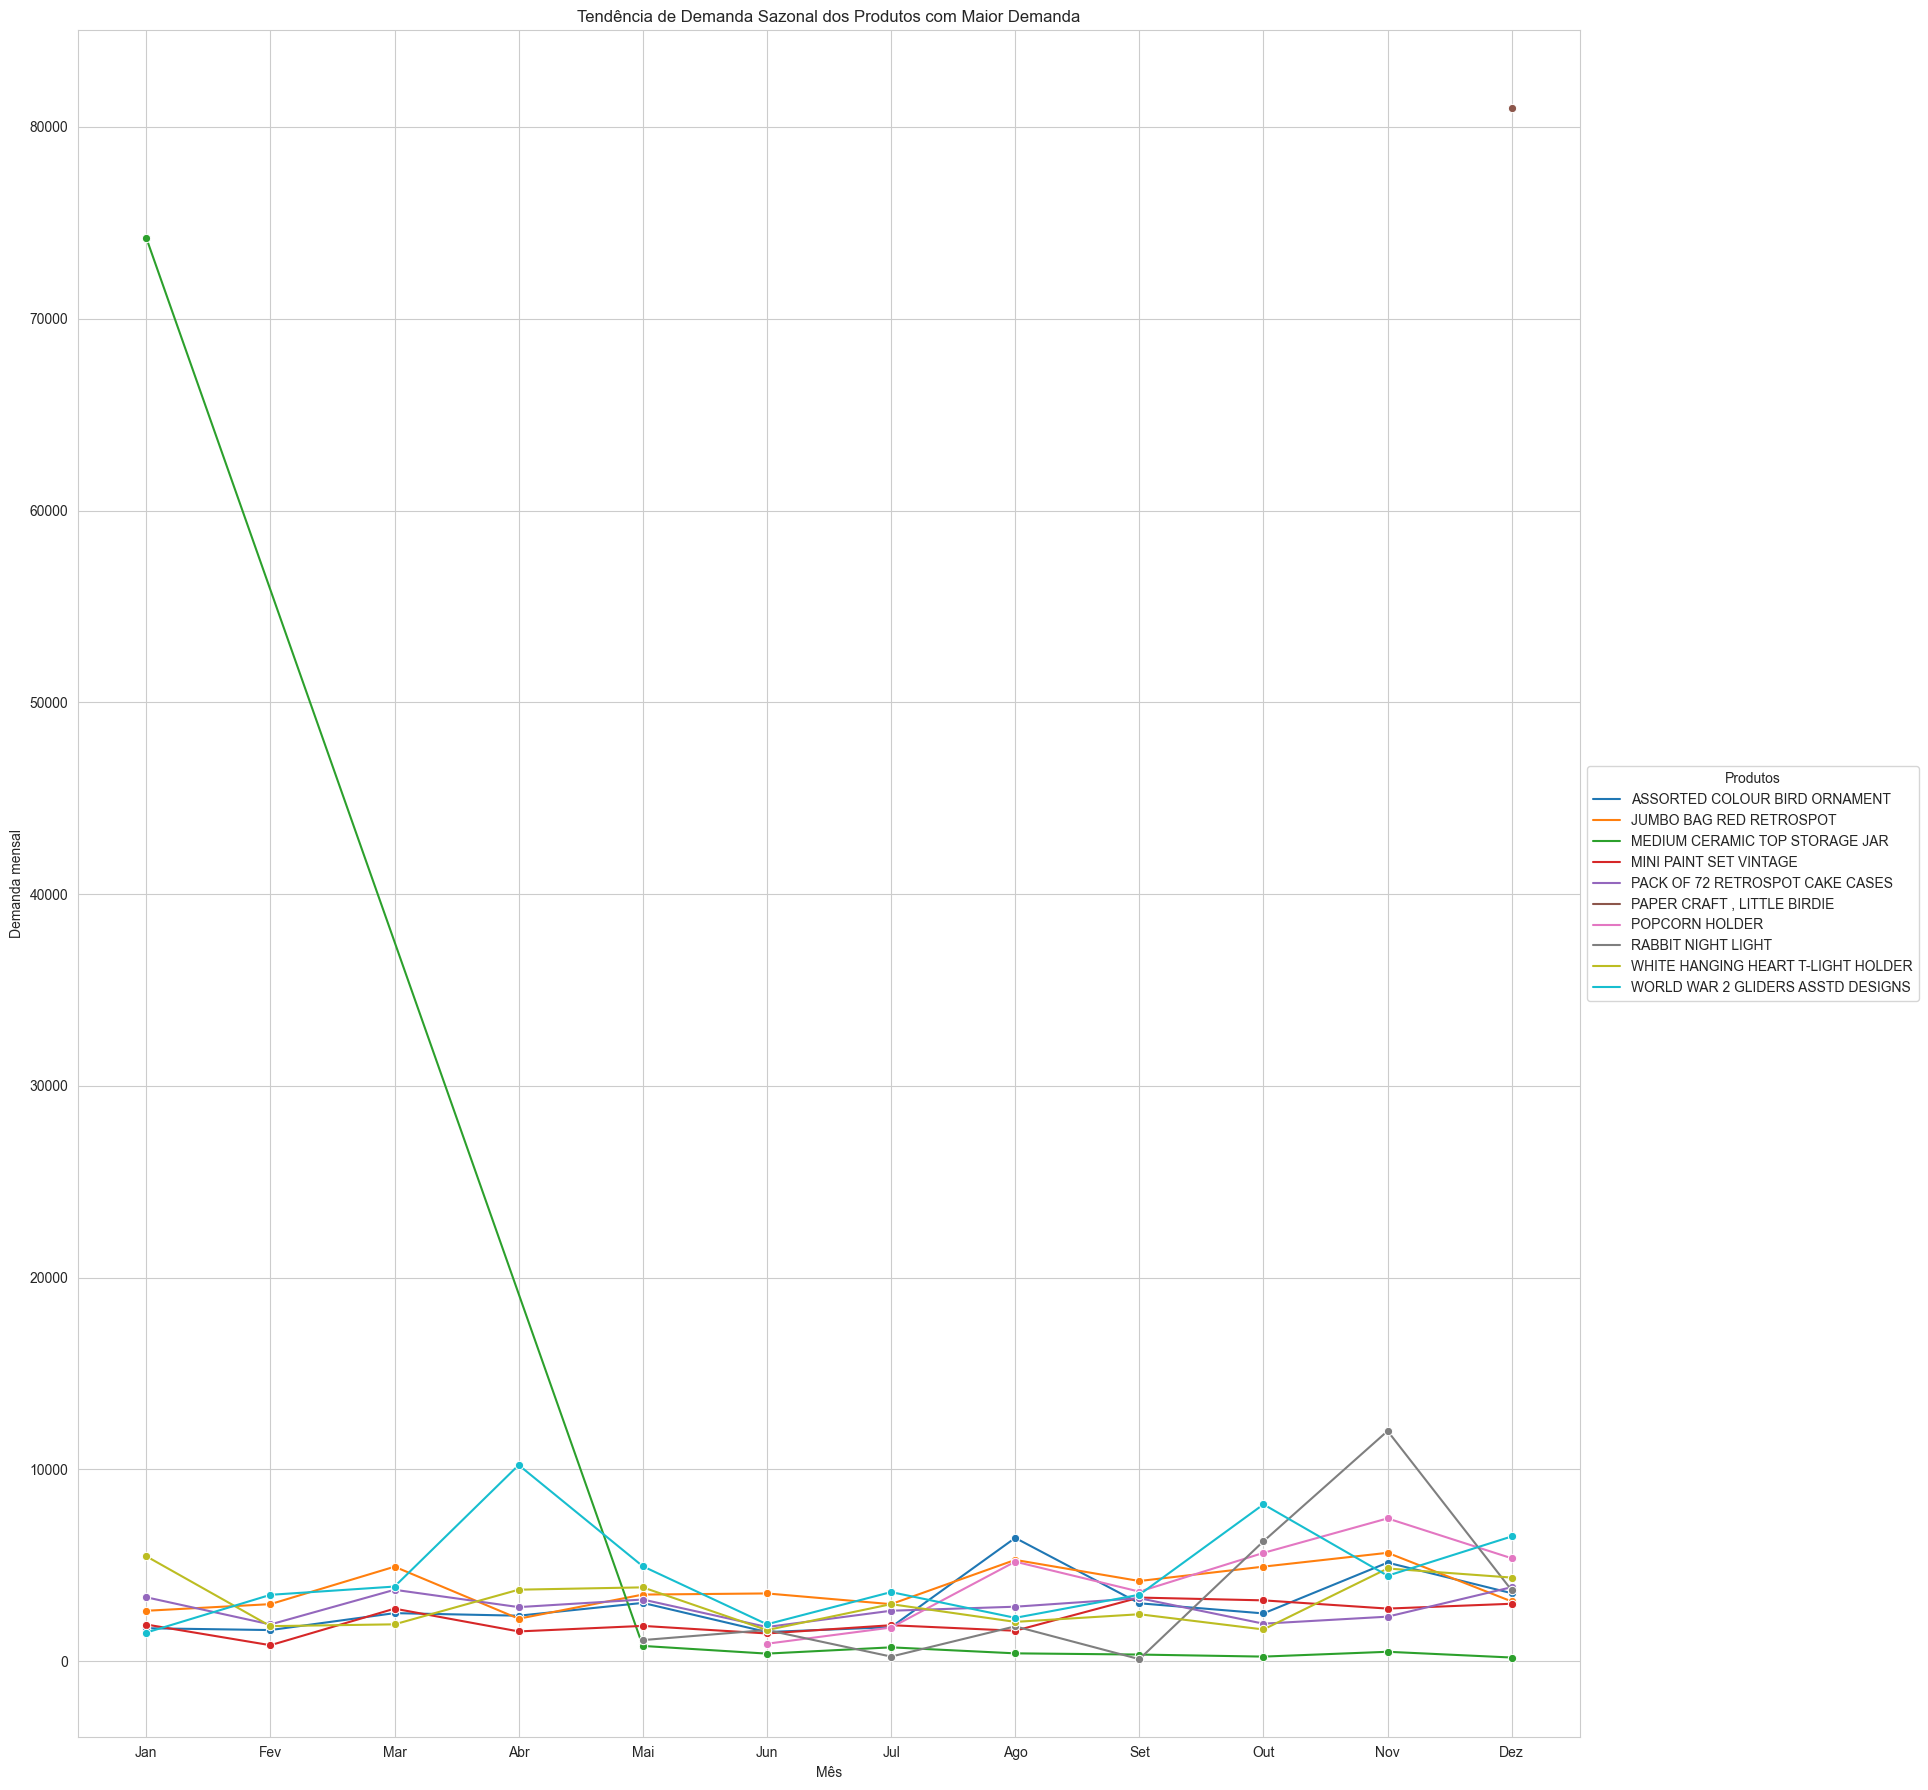

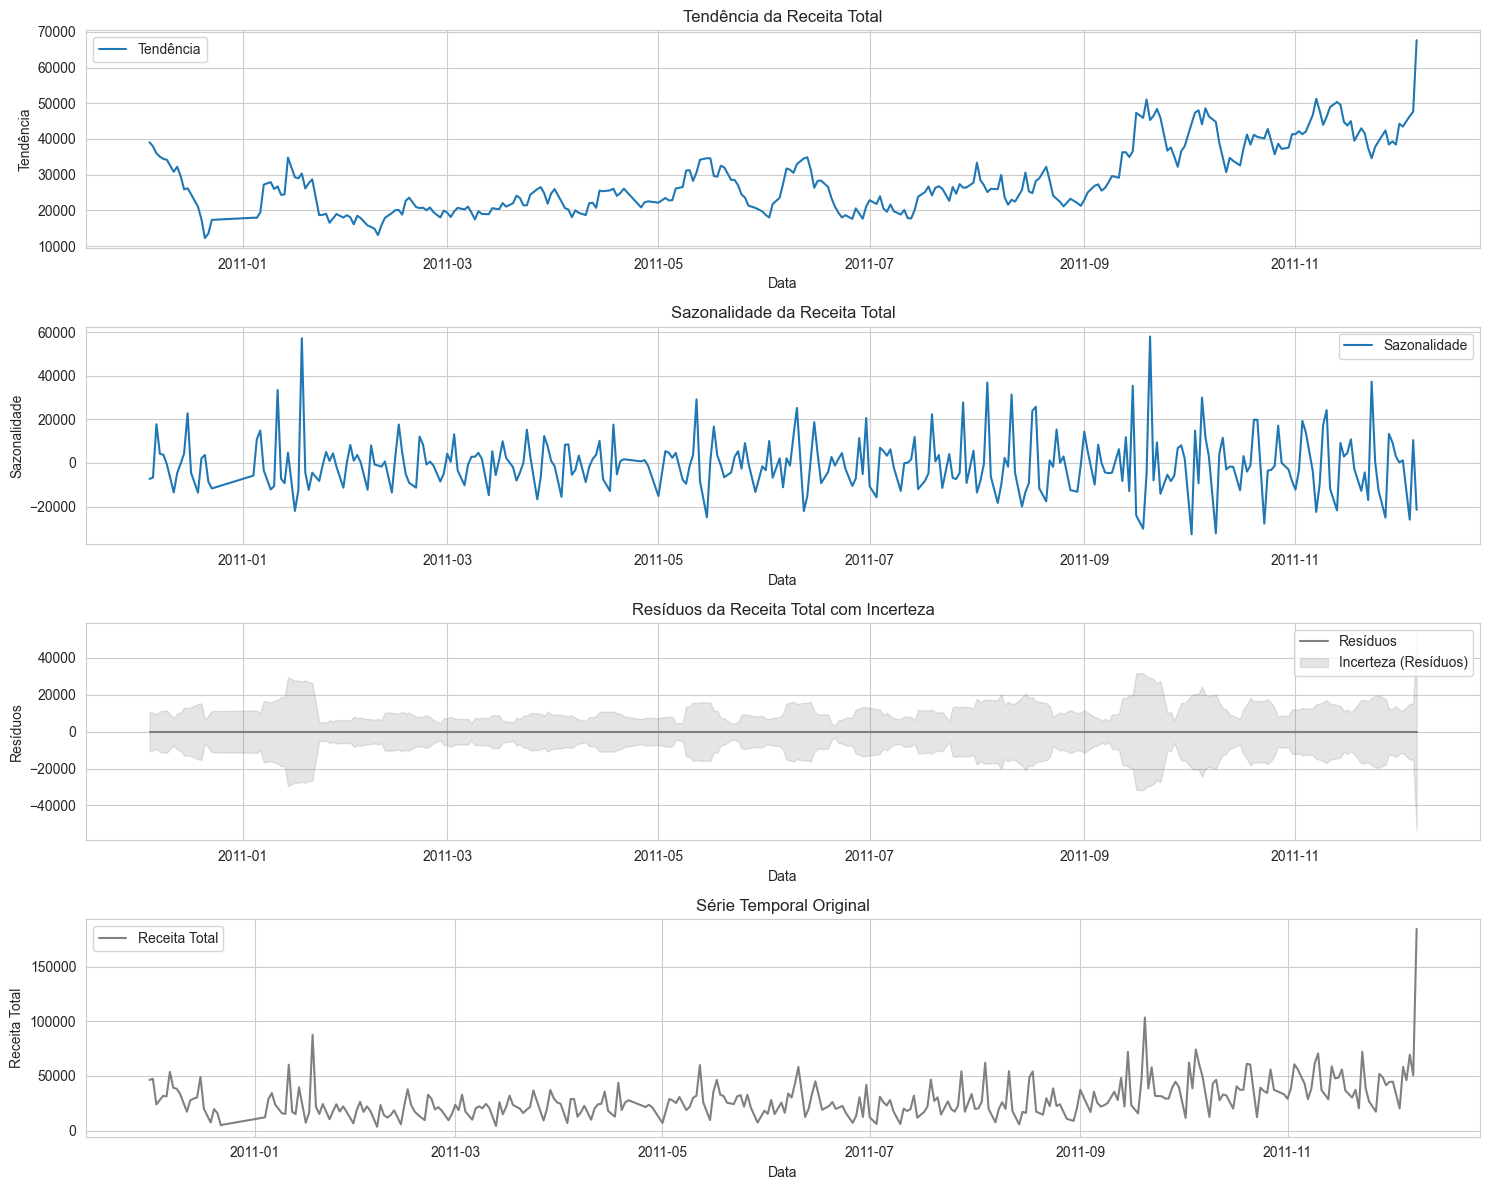

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
    
    
#____________________________________Análise Exploratória dos Dados ________________________#
df = pd.read_excel("./Docs/Datasets/PreProcessedData.xlsx")
    
df['Revenue'] = df['Quantity'] * df['Price']
    
# Converter o atributo InvoiceDate para o formato de data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df["Customer ID"] = df["Customer ID"].astype(int)
    
# Agrupar os dados por dia e calcular a soma das vendas, quantidade de produtos vendidos e receita total para cada dia
df_por_dia = df.groupby(df['InvoiceDate'].dt.date).agg({
        'Revenue': 'sum',
        'Quantity': 'sum',
        'Price': 'sum'
    })
    
# Criar gráfico de linha para visualizar a variação das vendas ao longo dos dias
plt.figure(figsize=(12, 6))
plt.plot(df_por_dia.index, df_por_dia['Revenue'])
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Variação das Vendas ao Longo dos Dias')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
    
    
# Criar gráfico de barras para visualizar a quantidade de produtos vendidos por semana
df_por_semana = df.resample('W', on='InvoiceDate').sum()
plt.figure(figsize=(12, 6))
plt.bar(df_por_semana.index, df_por_semana['Quantity'])
plt.xlabel('Semana')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.title('Variação da Quantidade de Produtos Vendidos por Semana')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
    
    
# Criar gráfico de área para visualizar a receita total por mês
df_por_mes = df.resample('M', on='InvoiceDate').sum()
plt.figure(figsize=(12, 6))
plt.plot(df_por_mes.index, df_por_mes['Price'])
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.title('Variação da Receita Total por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
    
 #__________________Produtos mais vendidos em termos de quantidade e receita___________________________________________#
    
#Agrupar os dados pelo atributo 'Description' e calcular a quantidade total vendida de cada produto
quantidade_vendida = df.groupby('Description')['Quantity'].sum().reset_index()
    
# Ordenar os produtos em ordem decrescente de quantidade vendida
quantidade_vendida = quantidade_vendida.sort_values(by='Quantity', ascending=False)
    
    
# Agrupar os dados pelo atributo 'Description' e calcular a receita total gerada por cada produto
receita_por_produto = df.groupby('Description')['Revenue'].sum().reset_index()
    
# Ordenar os produtos em ordem decrescente de receita gerada
receita_por_produto = receita_por_produto.sort_values(by='Revenue', ascending=False)
    
print("Produto mais vendido em termos de quantidade: ", quantidade_vendida.head(10))
    
# Plotar o gráfico das top 10 produtos mais vendidos em termos de quantidade
plt.figure(figsize=(12, 6))
plt.bar(quantidade_vendida['Description'][:10], quantidade_vendida['Quantity'][:10])
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Produtos Mais Vendidos em Termos de Quantidade')
plt.xticks(rotation=45)
plt.show()
    
    
print("Produto com maior receita: ", receita_por_produto.head(10))
    
# Plotar o gráfico das top 10 produtos com maior receita gerada
plt.figure(figsize=(12, 6))
plt.bar(receita_por_produto['Description'][:10], receita_por_produto['Revenue'][:10])
plt.xlabel('Produto')
plt.ylabel('Receita Gerada')
plt.title('Top 10 Produtos com Maior Receita Gerada')
plt.xticks(rotation=45)
plt.show()
    
#___________________________________Clientes que mais gastaram em termos de receita total _____________#
    
# Agrupar os dados por cliente e calcular a receita total para cada um
receita_por_cliente = df.groupby('Customer ID')['Revenue'].sum().reset_index()
    
# Ordenar os clientes em ordem decrescente de receita total
top_clientes_receita = receita_por_cliente.sort_values(by='Revenue', ascending=False)
    
# Exibir os 10 clientes que mais gastaram em termos de receita total
top_10_clientes = top_clientes_receita.head(10)

# Adicione a palavra 'client' na frente do ID do cliente para os rótulos
top_10_clientes.loc[:, 'Customer ID'] = 'CLIENT_ID ' + top_10_clientes['Customer ID'].astype(str)

# Plotar o gráfico de barras invertidas com a receita de cada cliente
plt.figure(figsize=(10, 6))
plt.barh(top_10_clientes['Customer ID'], top_10_clientes['Revenue'])
plt.xlabel('Receita Total')
plt.title('Receita Gerada por Cliente (Top 10)')
plt.gca().invert_yaxis()  # Inverter a ordem das barras para ter a maior receita no topo
plt.show()
#___________________________Periodo de maior actividade de compras ________________________________#
    
# Extrair a hora do dia da coluna InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour
    
# Agrupar os dados por hora do dia e calcular o total de vendas em cada hora
vendas_por_hora = df.groupby('Hour')['Revenue'].sum()
    
# Encontrar a hora do dia com maior atividade de compras
hora_mais_ativa = vendas_por_hora.idxmax()
total_vendas_hora_mais_ativa = vendas_por_hora.max()
    
# Exibir a hora do dia com maior atividade de compras e o total de vendas nessa hora
print(f"Horário de Maior Atividade de Compras: {hora_mais_ativa}h")
print(f"Total de Vendas nessa Hora: {total_vendas_hora_mais_ativa:.2f}")
    
# Plotar o gráfico de barras com as vendas por hora do dia
plt.figure(figsize=(12, 6))
plt.bar(vendas_por_hora.index, vendas_por_hora)
plt.xlabel('Hora do Dia')
plt.ylabel('Receita gerada no horário')
plt.title('Atividade de Compras por Hora do Dia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
    
    
#_________________________________ Identificar clientes que só compraram uma vez _______________#
    
# Contar a quantidade de compras realizadas por cada cliente
compras_por_cliente = df['Customer ID'].value_counts()
    
# Identificar os clientes que fizeram apenas uma compra
clientes_compra_unica = compras_por_cliente[compras_por_cliente == 1]
    
# Imprimir os clientes que compraram apenas uma vez
print(clientes_compra_unica.count(), "clientes compraram só uma vez.")
    
    
#_____________________________________Países com crescimento ao longo do tempo_______________________#

# Filtrar as linhas onde o país não seja "United Kingdom"
non_uk_sales = df[df['Country'] != 'United Kingdom']

# Agrupar os dados por país (Country) e data (InvoiceDate) e calcular a receita total para cada um
vendas_por_pais_data = non_uk_sales.groupby(['Country', 'InvoiceDate'])['Revenue'].sum().reset_index()

# Ordenar os dados por país e data
vendas_por_pais_data = vendas_por_pais_data.sort_values(by=['Country', 'InvoiceDate'])

# Calcular o crescimento percentual das vendas em relação ao período anterior para cada país
vendas_por_pais_data['Crescimento'] = vendas_por_pais_data.groupby('Country')['Revenue'].pct_change()

# Remover os valores infinitos e NaN gerados pelo cálculo do crescimento
vendas_por_pais_data = vendas_por_pais_data.replace([np.inf, -np.inf], np.nan).dropna()

# Agrupar os dados novamente por país e calcular o crescimento total das vendas para cada um
crescimento_total_por_pais = vendas_por_pais_data.groupby('Country')['Crescimento'].sum().reset_index()

# Ordenar os países em ordem decrescente de crescimento
paises_com_maior_crescimento = crescimento_total_por_pais.sort_values(by='Crescimento', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(paises_com_maior_crescimento['Country'], paises_com_maior_crescimento['Crescimento'])
plt.xlabel('País')
plt.ylabel('Crescimento das Vendas')
plt.title('Países com Maior Crescimento nas Vendas ao Longo do Tempo (excluindo o Reino Unido)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#________________________Detecção dos clientes mais activos e fieis _________________________#
    
# Agrupar por Customer ID e contar o número de transações de cada cliente
customer_transactions = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
customer_transactions.rename(columns={'Invoice': 'TransactionCount'}, inplace=True)
    
# Ordenar o DataFrame pelo total de transações em ordem decrescente
customer_transactions.sort_values(by='TransactionCount', ascending=False, inplace=True)
    
# Selecionar os 10 clientes com mais transações
top_10_customers = customer_transactions.head(10)

# Adicione a palavra 'client' na frente do ID do cliente para os rótulos
top_10_customers.loc[:, 'Customer ID'] = 'CLIENT_ID ' + top_10_customers['Customer ID'].astype(str)

# Plotar gráfico de barras invertidas com os 10 clientes com mais transações
plt.figure(figsize=(10, 6))
plt.title('Clientes mais ativos e fiéis (Top 10)')
plt.barh(top_10_customers['Customer ID'], top_10_customers['TransactionCount'])

plt.xlabel('Número de Transações')
plt.ylabel('Cliente')
plt.show()


#___________________________Países com maior volume de vendas ____________________________________#

# Filtrar as linhas onde o país não seja "United Kingdom"
non_uk_sales = df[df['Country'] != 'United Kingdom']

# Agrupar por país e calcular o total de vendas para cada país
country_sales = non_uk_sales.groupby('Country')['Price'].sum().reset_index()
country_sales.rename(columns={'Price': 'TotalSales'}, inplace=True)

# Ordenar o DataFrame pelo total de vendas em ordem decrescente
country_sales.sort_values(by='TotalSales', ascending=False, inplace=True)

# Plotar gráfico de barras com os países de maior volume de vendas
plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'], country_sales['TotalSales'])
plt.xlabel('País')
plt.ylabel('Total de vendas')
plt.title('Países com maior volume de vendas (excluindo o Reino Unido)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
    
    
#________________________ Produtos com maior demanda sazonal __________________________________#
# Converter a coluna InvoiceDate para o tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Criar colunas para o mês e o ano da transação
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Agrupar por produto e mês para calcular a demanda sazonal
product_monthly_demand = df.groupby(['Description', 'Month'])['Quantity'].sum().reset_index()

# Calcular o total de vendas para cada produto
product_total_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Filtrar apenas os produtos com maior demanda
top_products = product_total_sales.nlargest(10, 'Quantity')['Description']

# Filtrar os dados apenas para os produtos com maior demanda
product_monthly_demand_top = product_monthly_demand[product_monthly_demand['Description'].isin(top_products)]

# Plotar gráfico de linhas para mostrar a demanda sazonal dos produtos com maior demanda
plt.figure(figsize=(16, 18))
sns.lineplot(data=product_monthly_demand_top, x='Month', y='Quantity', hue='Description', marker='o')
plt.xlabel('Mês')
plt.ylabel('Demanda mensal')
plt.title('Tendência de Demanda Sazonal dos Produtos com Maior Demanda')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.legend(title='Produtos', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    
#__________________________________________Decomposição sazonal da receita total ____________________#
# Agrupar os dados por data e calcular a receita total (ou outra métrica de interesse)
df_por_data = df.groupby(df['InvoiceDate'].dt.date).agg({
        'Revenue': 'sum',
        'Quantity': 'sum'
    }).reset_index()
    
# Configurar a coluna de data como índice do DataFrame
df_por_data.set_index('InvoiceDate', inplace=True)
    
# Verificar se o índice é do tipo DatetimeIndex
if not isinstance(df_por_data.index, pd.DatetimeIndex):
    df_por_data.index = pd.to_datetime(df_por_data.index)
    
# Calcular a tendência (média móvel de 7 dias)
trend = df_por_data['Revenue'].rolling(window=7, center=True).mean()
    
# Calcular a sazonalidade (diferença entre os dados e a tendência)
seasonal = df_por_data['Revenue'] - trend
    
# Calcular os resíduos (dados - tendência - sazonalidade)
residual = df_por_data['Revenue'] - trend - seasonal
    
# Calcular a incerteza (desvio padrão da média móvel de 7 dias)
rolling_std = df_por_data['Revenue'].rolling(window=7, center=True).std()
    
# Plotar os componentes da decomposição
plt.figure(figsize=(15, 12))
    
# Tendência
plt.subplot(4, 1, 1)
plt.plot(trend, label='Tendência')
plt.xlabel('Data')
plt.ylabel('Tendência')
plt.legend()
plt.title('Tendência da Receita Total')
    
# Sazonalidade
plt.subplot(4, 1, 2)
plt.plot(seasonal, label='Sazonalidade')
plt.xlabel('Data')
plt.ylabel('Sazonalidade')
plt.legend()
plt.title('Sazonalidade da Receita Total')
    
# Resíduos com incerteza
plt.subplot(4, 1, 3)
plt.plot(residual, label='Resíduos', color='gray')
plt.fill_between(df_por_data.index, -rolling_std, rolling_std, color='gray', alpha=0.2, label='Incerteza (Resíduos)')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.legend()
plt.title('Resíduos da Receita Total com Incerteza')
    
# Série Temporal Original
plt.subplot(4, 1, 4)
plt.plot(df_por_data['Revenue'], label='Receita Total', color='gray')
plt.xlabel('Data')
plt.ylabel('Receita Total')
plt.legend()
plt.title('Série Temporal Original')
    
plt.tight_layout()
plt.show()

n_clusters =  2
A média do coeficiente de silhoueta é:  0.9684084238414633
n_clusters =  3
A média do coeficiente de silhoueta é:  0.8792468033248598
n_clusters =  4
A média do coeficiente de silhoueta é:  0.29053560788799043
n_clusters =  5
A média do coeficiente de silhoueta é:  0.3626877639726793
n_clusters =  6
A média do coeficiente de silhoueta é:  0.44332192864502085
n_clusters =  7
A média do coeficiente de silhoueta é:  0.44324278855959526
n_clusters =  8
A média do coeficiente de silhoueta é:  0.4482780333514537
n_clusters =  9
A média do coeficiente de silhoueta é:  0.44740051668211117
n_clusters =  10
A média do coeficiente de silhoueta é:  0.44302142595992205
n_clusters =  11
A média do coeficiente de silhoueta é:  0.3968923870490835
O índice de Dunn para 8 clusters é: 0.6033453956778728
Análise Cluster  0
Quantity             9.280228
Price                2.785982
Revenue             14.397606
frequency            3.060136
min_recency         36.652006
monetary_value    1

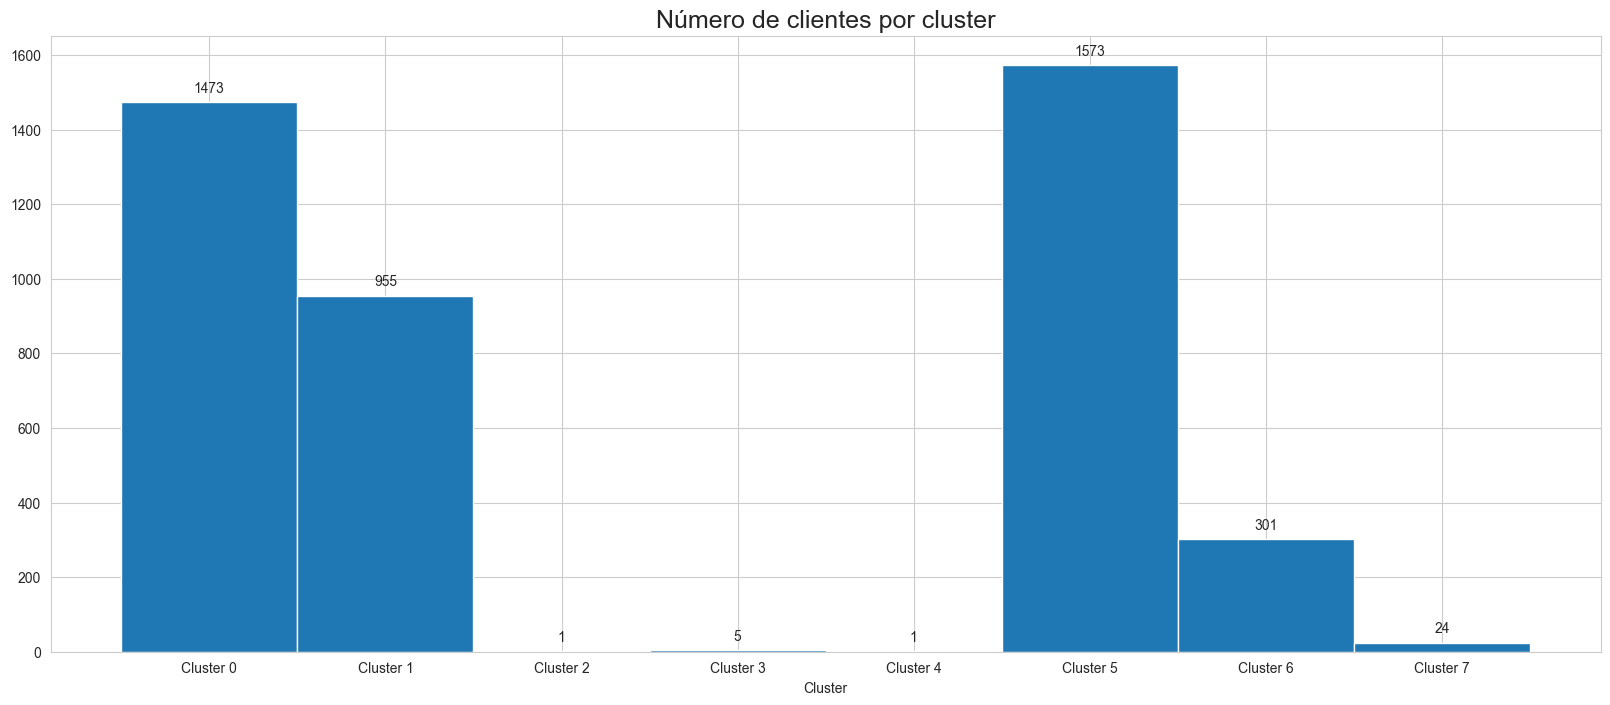

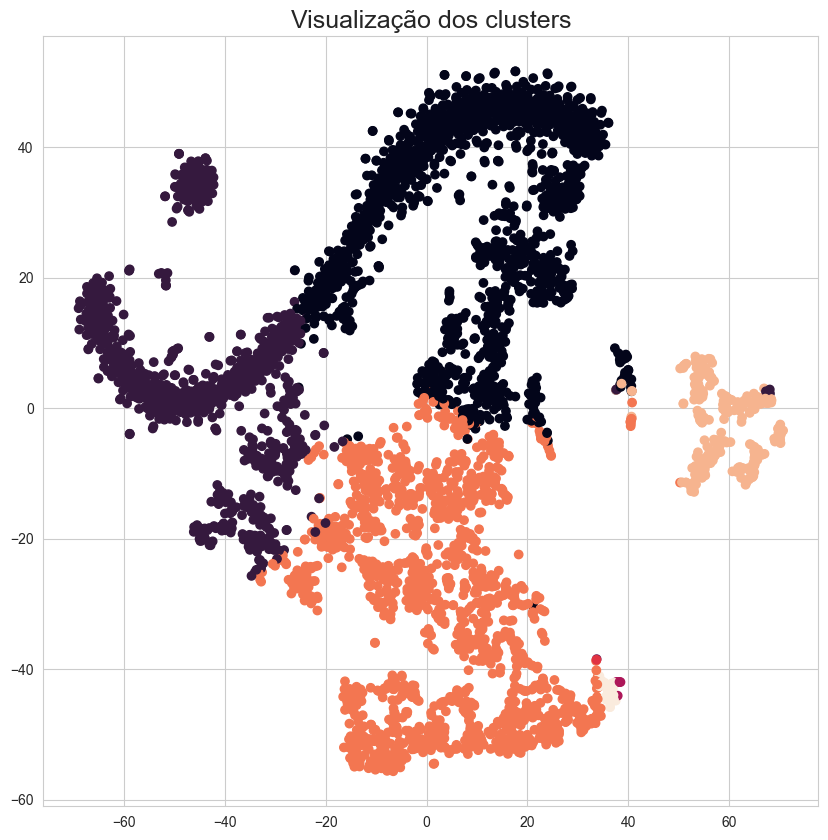

In [19]:
#______________________________________SEGMENTAÇÃO USANDO K-MEANS_________________________________________________________________#

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import warnings
import time

#Modelos 
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn.manifold import  TSNE

warnings.filterwarnings("ignore")

#Criar dataframe com os dados preprocessados
df = pd.read_excel('./Docs/Datasets/PreProcessedData.xlsx')

#Converter dados da coluna Customer ID para inteiro
df["Customer ID"] = df["Customer ID"].astype(int)
#___________________________________________________________________________Análise RFM ________________________________________________________________________#
#Funcçoes  que calculam o indice de Dunn
def calculate_diameter(cluster):
    return np.max(pairwise_distances(cluster))

def calculate_intercluster_distance(centers):
    distances = pairwise_distances(centers)
    np.fill_diagonal(distances, np.inf)
    return np.min(distances)

def dunn_index(data, labels):
    cluster_centers = [np.mean(data[labels == label], axis=0) for label in np.unique(labels)]
    max_diameter = max(calculate_diameter(data[labels == label]) for label in np.unique(labels))
    min_inter_distance = calculate_intercluster_distance(np.array(cluster_centers))
    return ((min_inter_distance / max_diameter))

#Função que calcula o Score do cliente com base na Recência
def Recency_Score(x, y, d):
    if x <= d[y][0.25]:
        return 1
    elif x <= d[y][0.5]:
        return 2
    elif x <= d[y][0.75]:
        return 3
    else:
        return 4
    
#Função que calcula o Score do cliente com base na Frequência e no Valor Monetário
def Frequency_Monetary_Score(x,y,d):
    if x <= d[y][0.25]:
        return 4
    elif x <= d[y][0.5]:
        return 3
    elif x <= d[y][0.75]:
        return 3
    else:
        return 1

#Calcular o preço total da transação
df['Revenue'] = df['Price'] * df['Quantity']

#Calcular data mais antiga e data mais recente do dataframe
df['InvoiceDate'].min()
df['InvoiceDate'].max()

#Primeira data após a data máxima do dataframe para exploração
today = dt.datetime(2011,12,10)

#Converter valores da coluna InvoiceDate para DateTime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Criar dicionário de agregação
customer_aggregation = {}
customer_aggregation['InvoiceDate'] = lambda x:x.iloc[0]
customer_aggregation['Customer ID'] = lambda x:x.iloc[0]
customer_aggregation['Revenue'] = "sum"

#Agregar clientes com base na factura
rfm = df.groupby('Invoice').agg(customer_aggregation)

#Calcular a recência
rfm['Recency'] =  today - rfm['InvoiceDate']

# Converter timedelta de nanosegundos para segundos
rfm['Recency'] = pd.to_timedelta(rfm['Recency']).dt.total_seconds()

# Converter segundos para dias
rfm['Recency'] = rfm['Recency'] / (24 * 60 * 60)


#Criar dicionário de agregação final
customer_aggregation = {}
customer_aggregation['Recency'] = ['min', 'max']
customer_aggregation['InvoiceDate'] = lambda x: len(x)
customer_aggregation['Revenue'] = "sum"

#Agrupar clientes com base no Customer ID
rfmTable = rfm.groupby("Customer ID").agg(customer_aggregation)

#Renomear colunas
rfmTable.columns = ['min_recency', 'max_recency', 'frequency', 'monetary_value']


#Calcular os quartis do dataframe para análise RFM
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])

#Converter para um dicionário para atribuição ao dataframe original rfmTable
quantiles = quantiles.to_dict()

#Gerar novo dataframe com o dataframe agregado por Customer ID
new_rfm = rfmTable

#Popular colunas no novo dataframe com os scores RFM
new_rfm['quartile_r'] = new_rfm['min_recency'].apply(Recency_Score, args =('min_recency', quantiles,))
new_rfm['quartile_f'] = new_rfm['frequency'].apply(Frequency_Monetary_Score, args =('frequency', quantiles,))
new_rfm['quartile_m'] = new_rfm['monetary_value'].apply(Frequency_Monetary_Score, args =('monetary_value', quantiles,))

#Criar nova coluna RFMScore concatenando  os Scores R, F e M
new_rfm['RFMScore'] = new_rfm.quartile_r.map(str) + new_rfm.quartile_f.map(str) + new_rfm.quartile_m.map(str)

#print(new_rfm.head(5))


#Mesclar o dataframe da analise RFM ao dataframe original
df = pd.merge(df, new_rfm, on='Customer ID')

#Eliminar colunas auxiliares
df = df.drop(columns=['Unnamed: 0', 'quartile_r', 'quartile_f', 'quartile_m'])

df.to_excel('./Docs/Datasets/CustomerBehaviour.xlsx', index=False)
#_______________________________________________________________________AGRUPAR CLIENTES COM BASE FACTURA ________________________________________________#
#Agrupar dados com base na factura
cluster = df['Description']

#Criar df auxiliar com os clusters por descrição
df_aux = pd.get_dummies(cluster, prefix='Cluster').mul(df['Revenue'], 0)

#Concatenar a factura ao dataframe df_aux
df_aux = pd.concat([df['Invoice'], df_aux], axis=1)

#df_aux arupado por factura
df_aux_grouped = df_aux.groupby('Invoice').sum()

#Criar dicionário para popular dataframe
customer_aggregation = {}
customer_aggregation['Revenue'] = lambda x:x.iloc[0]
customer_aggregation['country_encoded'] = lambda x:x.iloc[0]
customer_aggregation['Customer ID'] = lambda x:x.iloc[0]
customer_aggregation['max_recency'] = lambda x:x.iloc[0]
customer_aggregation['monetary_value'] = lambda x:x.iloc[0]
customer_aggregation['frequency'] = lambda x:x.iloc[0]
customer_aggregation['Quantity'] = 'sum'
customer_aggregation['min_recency'] = lambda x:x.iloc[0]

#Agrupar o dataframe por factura e popular
df_grouped = df.groupby('Invoice').agg(customer_aggregation)

#Concatenar df_grouped e df_aux_grouped e agrupar pelo Customer ID
df_aux_grouped_final = pd.concat([df_grouped['Customer ID'],df_aux_grouped], axis=1).set_index('Customer ID').groupby('Customer ID').sum()
#Normalizar por percentagens
df_aux_grouped_final = df_aux_grouped_final.div(df_aux_grouped_final.sum(axis=1), axis=0)
#Preencher valores vazios com 0
df_aux_grouped_final = df_aux_grouped_final.fillna(0)

#Criar dicionário para popular dataframe
customer_aggregation = {}
customer_aggregation['min_recency'] = lambda x:x.iloc[0]
customer_aggregation['Revenue'] = ['min', 'max', 'mean']
customer_aggregation['monetary_value'] = lambda x:x.iloc[0]
customer_aggregation['Quantity'] = 'sum'
customer_aggregation['country_encoded'] = lambda x:x.iloc[0]
customer_aggregation['max_recency'] = lambda x:x.iloc[0]
customer_aggregation['frequency'] = lambda x:x.iloc[0]

#Agrupar clientes pelo Customer ID
df_grouped_final = df_grouped.groupby("Customer ID").agg(customer_aggregation)

#Renomear colunas
df_grouped_final.columns = ['min', 'max', 'mean', 'min_recency', 'max_recency', 'frequency', 'monetary_value','quantity', 'country']


#Converter para matrizes numpy para manipulação
dim1 = df_grouped_final.to_numpy()
dim2 = df_aux_grouped_final .to_numpy()

#Padronização antes da aplicação do modelo
scaler = StandardScaler()
dim1 = scaler.fit_transform(dim1)
final_df = np.concatenate((dim1,dim2), axis=1)

f_df = pd.DataFrame(final_df)

f_df.to_excel('./Docs/Datasets/final_df.xlsx', index=False)

#Range do for
x = list(range(2,12))
    
#Variavel que armazena os coeficientes de silhouette
coeficientes = []

for n_clusters in x:
        print("n_clusters = ", n_clusters)
        
        kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
        kmeans.fit(final_df)
        clusters = kmeans.predict(final_df)
        silhouette_per_x = silhouette_score(final_df, clusters)
        coeficientes.append(silhouette_per_x)
        print('A média do coeficiente de silhoueta é: ', silhouette_per_x)


# Aplicar os dados ao modelo com base no número de clusters escolhido
kmeans = KMeans(init='k-means++', n_clusters=8, random_state=0)

kmeans.fit(final_df)

#Clusters gerados
clusters = kmeans.predict(final_df)

#Avaliação do modelo
dunn_index_value = dunn_index(final_df, clusters)


print('O índice de Dunn para 8 clusters é:', dunn_index_value)


#Histograma com o número de clientes por cluster
plt.figure(figsize=(20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel('Cluster')
plt.title("Número de clientes por cluster", fontsize=18)
plt.xticks([rect.get_x() + rect.get_width() / 2 for rect in patches], ['Cluster {}'.format(x) for x in range(8)])

#Adicionar anotações ao histograma
for rect in patches:
    altura = rect.get_height()
    comprimento = rect.get_x() + rect.get_width() / 2
    
    espaco = 5
    bottom = "bottom"
    label = str(int(altura))
    
    plt.annotate(
        label,
        (comprimento, altura),
        xytext=(0,espaco),
        textcoords='offset points',
        ha='center',
        va=bottom
    )

#Atribuir clusters gerados aos clientes
df_grouped_final['cluster'] = clusters

#Concatenar o dataframe auxiliar ao dataframe original
final_dataset = pd.concat([df_grouped_final, df_aux_grouped_final], axis=1)
#final_dataset.head()

#Redefinir índice num novo dataframe para exportar   
exportable_df = final_dataset.reset_index()
exportable_df.to_excel('./Docs/Datasets/DatasetClusterizado_K_Means.xlsx', index=False)



#_____________________________________________________________________VISUALIZAÇÃO DOS CLUSTERS E INTERPRETAÇÃO________________________________________________#
#Reduzir dimensionalidade do final_df para duas dimensões
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(final_df)

#Dimensões do grafico
w = proj[:,0]
h = proj[:,1]

#Plotar gráfico dos clusters
plt.figure(figsize=(10,10))
plt.scatter(w, h, c=clusters)
plt.title("Visualização dos clusters", fontsize='18')


#_________________________________________________________________ANÁLISE DE CLUSTERS _____________________________________________________________________#

for cluster_num in range(8):
    df_temporario= final_dataset.reset_index()
    print("Análise Cluster ", cluster_num)

    cust = list(df_temporario[df_temporario['cluster'] == cluster_num]['Customer ID'])
    current_cluster = df[df['Customer ID'].isin(cust)]

    print(current_cluster[['Quantity', 'Price', 'Revenue', 'frequency', 'min_recency', 'monetary_value']].mean())
    
    print(current_cluster['Description'].value_counts().head(10))

    
    customer_aggregation = {}
    customer_aggregation['Country'] = lambda x: x.iloc[0]
    customer_aggregation['RFMScore'] = lambda x: x.iloc[0]

    cluster_grouped = current_cluster.groupby('Customer ID').agg(customer_aggregation)

    print(cluster_grouped['RFMScore'].value_counts())


# Data

n_clusters =  2
A média do coeficiente de silhoueta é:  0.2600702011097733
n_clusters =  3
A média do coeficiente de silhoueta é:  0.3524511222830015
n_clusters =  4
A média do coeficiente de silhoueta é:  0.2234708037870508
n_clusters =  5
A média do coeficiente de silhoueta é:  0.21412864170909388
n_clusters =  6
A média do coeficiente de silhoueta é:  0.2475995219901877
n_clusters =  7
A média do coeficiente de silhoueta é:  0.2435347181225794
n_clusters =  8
A média do coeficiente de silhoueta é:  0.29784762779563956
n_clusters =  9
A média do coeficiente de silhoueta é:  0.2813169520128149
n_clusters =  10
A média do coeficiente de silhoueta é:  0.1747403485422047
n_clusters =  11
A média do coeficiente de silhoueta é:  0.1746397075082622
O índice de Dunn para 8 clusters é: 0.5486984928238761
Análise Cluster 0
Quantity             9.199427
Price                2.780860
Revenue             14.630531
frequency            4.251306
min_recency         34.254222
monetary_value    1570.

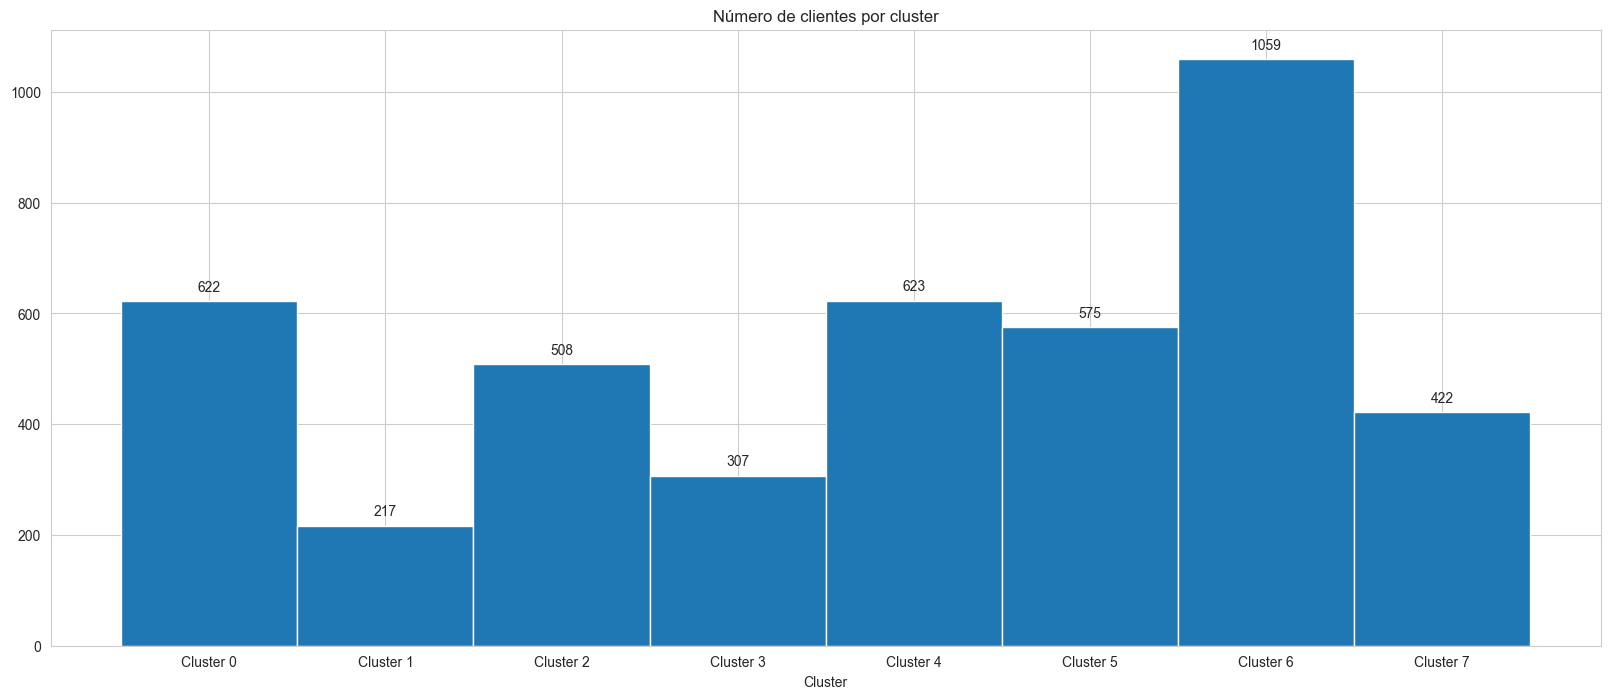

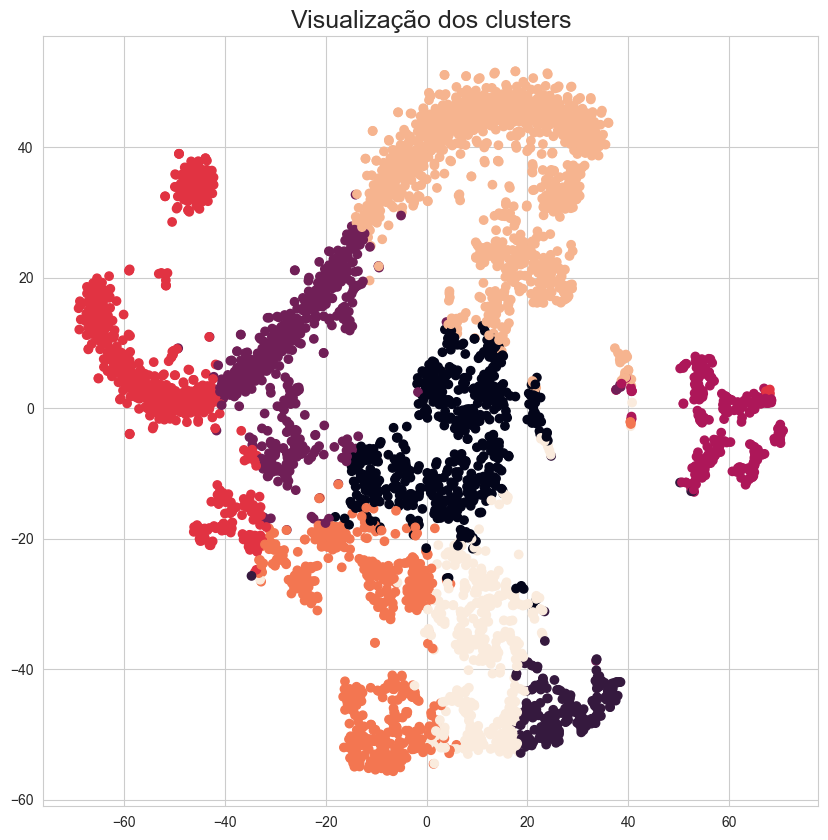

In [16]:
#___________________________________________CLUSTERING USANDO K-MEDOIDS_____________________________________________#


import datetime as dt
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

#Modelagem
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import  silhouette_score
from sklearn.manifold import  TSNE

warnings.filterwarnings("ignore")

#Criar dataframe com os dados preprocessados
df = pd.read_excel('./Docs/Datasets/PreProcessedData.xlsx')

#Converter dados da coluna Customer ID para inteiro
df["Customer ID"] = df["Customer ID"].astype(int)
#___________________________________________________________________________Análise RFM ________________________________________________________________________#
#Funcçoes  que calculam o indice de Dunn
def calculate_diameter(cluster):
    return np.max(pairwise_distances(cluster))

def calculate_intercluster_distance(centers):
    distances = pairwise_distances(centers)
    np.fill_diagonal(distances, np.inf)
    return np.min(distances)

def dunn_index(data, labels):
    cluster_centers = [np.mean(data[labels == label], axis=0) for label in np.unique(labels)]
    max_diameter = max(calculate_diameter(data[labels == label]) for label in np.unique(labels))
    min_inter_distance = calculate_intercluster_distance(np.array(cluster_centers))
    return ((min_inter_distance / max_diameter))

#Função que calcula o Score do cliente com base na Recência
def Recency_Score(x, y, d):
    if x <= d[y][0.25]:
        return 1
    elif x <= d[y][0.5]:
        return 2
    elif x <= d[y][0.75]:
        return 3
    else:
        return 4

#Função que calcula o Score do cliente com base na Frequência e no Valor Monetário
def Frequency_Monetary_Score(x,y,d):
    if x <= d[y][0.25]:
        return 4
    elif x <= d[y][0.5]:
        return 3
    elif x <= d[y][0.75]:
        return 3
    else:
        return 1

#Calcular o preço total d transação
df['Revenue'] = df['Price'] * df['Quantity']

#Calcular data mais antiga e data mais recente do dataframe
df['InvoiceDate'].min()
df['InvoiceDate'].max()

#Primeira data após a data máxima do dataframe para exploração
today = dt.datetime(2011,12,10)

#Converter valores da coluna InvoiceDate para DateTime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Criar dicionário de agregação
customer_aggregation = {}
customer_aggregation['InvoiceDate'] = lambda x:x.iloc[0]
customer_aggregation['Customer ID'] = lambda x:x.iloc[0]
customer_aggregation['Revenue'] = "sum"

#Agregar clientes com base na factura
rfm = df.groupby('Invoice').agg(customer_aggregation)

#Calcular a recência
rfm['Recency'] =  today - rfm['InvoiceDate']

# Converter timedelta de nanoseconds para seconds
rfm['Recency'] = pd.to_timedelta(rfm['Recency']).dt.total_seconds()

# Converter seconds para days
rfm['Recency'] = rfm['Recency'] / (24 * 60 * 60)

#rfmTable.head(5)

#Criar dicionário de agregação final
customer_aggregation = {}
customer_aggregation['Recency'] = ['min', 'max']
customer_aggregation['InvoiceDate'] = lambda x: len(x)
customer_aggregation['Revenue'] = "sum"

#Agrupar clientes com base no Customer ID
rfmTable = rfm.groupby("Customer ID").agg(customer_aggregation)

#Renomear colunas
rfmTable.columns = ['min_recency', 'max_recency', 'frequency', 'monetary_value']
#rfmTable_final.head(5)

#Calcular os quartis do dataframe para análise RFM
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])

#Converter para um dicionário para atribuição ao dataframe original rfmTable
quantiles = quantiles.to_dict()

#Gerar novo dataframe com 
new_rfm = rfmTable

#Popular colunas no novo dataframe com os scores RFM
new_rfm['quartile_r'] = new_rfm['min_recency'].apply(Recency_Score, args =('min_recency', quantiles,))
new_rfm['quartile_f'] = new_rfm['frequency'].apply(Frequency_Monetary_Score, args =('frequency', quantiles,))
new_rfm['quartile_m'] = new_rfm['monetary_value'].apply(Frequency_Monetary_Score, args =('monetary_value', quantiles,))

#Criar nova coluna RFMScore concatenando o os Scores R, F e M
new_rfm['RFMScore'] = new_rfm.quartile_r.map(str) + new_rfm.quartile_f.map(str) + new_rfm.quartile_m.map(str)

#segmented_rfm.head()

#Mesclar o dataframe da analise RFM ao dataframe original
df = pd.merge(df, new_rfm, on='Customer ID')

#Eliminar colunas desnecessárias
df = df.drop(columns=['Unnamed: 0', 'quartile_r', 'quartile_f', 'quartile_m'])

#_______________________________________________________________________AGRUPAR CLIENTES COM BASE NA FACTURA ________________________________________________#
#Agrupar dados com base na factura
cluster = df['Description']

#Criar df auxiliar com os clusters por descrição
df_aux = pd.get_dummies(cluster, prefix='Cluster').mul(df['Revenue'], 0)

#Concatenar a factura ao dataframe df_aux
df_aux = pd.concat([df['Invoice'], df_aux], axis=1)

#df_aux arupado por factura
df_aux_grouped = df_aux.groupby('Invoice').sum()

#Criar dicionário para popular dataframe
customer_aggregation = {}
customer_aggregation['Revenue'] = lambda x:x.iloc[0]
customer_aggregation['country_encoded'] = lambda x:x.iloc[0]
customer_aggregation['Customer ID'] = lambda x:x.iloc[0]
customer_aggregation['max_recency'] = lambda x:x.iloc[0]
customer_aggregation['monetary_value'] = lambda x:x.iloc[0]
customer_aggregation['frequency'] = lambda x:x.iloc[0]
customer_aggregation['Quantity'] = 'sum'
customer_aggregation['min_recency'] = lambda x:x.iloc[0]

#Agrupar o dataframe por factura e popular
df_grouped = df.groupby('Invoice').agg(customer_aggregation)

#Concatenar df_grouped e df_aux_grouped e agrupar pelo Customer ID
df_aux_grouped_final = pd.concat([df_grouped['Customer ID'],df_aux_grouped], axis=1).set_index('Customer ID').groupby('Customer ID').sum()
#Normalizar por percentagens
df_aux_grouped_final = df_aux_grouped_final.div(df_aux_grouped_final.sum(axis=1), axis=0)
#Preencher valores vazios com 0
df_aux_grouped_final = df_aux_grouped_final.fillna(0)

#Criar dicionário para popular dataframe
customer_aggregation = {}
customer_aggregation['min_recency'] = lambda x:x.iloc[0]
customer_aggregation['Revenue'] = ['min', 'max', 'mean']
customer_aggregation['monetary_value'] = lambda x:x.iloc[0]
customer_aggregation['Quantity'] = 'sum'
customer_aggregation['country_encoded'] = lambda x:x.iloc[0]
customer_aggregation['max_recency'] = lambda x:x.iloc[0]
customer_aggregation['frequency'] = lambda x:x.iloc[0]

#Agrupar clientes pelo Customer ID
df_grouped_final = df_grouped.groupby("Customer ID").agg(customer_aggregation)

#Renomear colunas
df_grouped_final.columns = ['min', 'max', 'mean', 'min_recency', 'max_recency', 'frequency', 'monetary_value','quantity', 'country']

#Converter para matrizes numpy para manipulação
dim1 = df_grouped_final.to_numpy()
dim2 = df_aux_grouped_final .to_numpy()

#Padronização antes da aplicação do modelo
scaler = StandardScaler()
dim1 = scaler.fit_transform(dim1)
final_df = np.concatenate((dim1,dim2), axis=1)

#Range do for
x = list(range(2,12))

#Variavel que armazena os coeficientes de silhouette
coeficientes = []


for n_clusters in x:
    print("n_clusters = ", n_clusters)

    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    clusters = kmedoids.fit_predict(final_df)
    silhouette_avg = silhouette_score(final_df, clusters)
    coeficientes.append(silhouette_avg)
    print('A média do coeficiente de silhoueta é: ', silhouette_avg)


#for _ in range(10):
    #start_time = time.time()
    
    # Escolher o numero de clusters
n_clusters = 8

# Inicializar o modelo com os 8 clusters
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)

# Aplicar os dados ao modelo do k-medoids
clusters = kmedoids.fit_predict(final_df)

#Avaliação do modelo
dunn_index_value = dunn_index(final_df, clusters)


print('O índice de Dunn para 8 clusters é:', dunn_index_value)
    #end_time = time.time()

    #elapsed_time = end_time - start_time
    #print(f"Tempo de processamento: {elapsed_time:.4f} segundos")

plt.figure(figsize=(20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel('Cluster')
plt.title("Número de clientes por cluster")
plt.xticks([rect.get_x() + rect.get_width() / 2 for rect in patches], ['Cluster {}'.format(x) for x in range(8)])

#Adicionar anotações ao histograma
for rect in patches:
    altura = rect.get_height()
    comprimento = rect.get_x() + rect.get_width() / 2

    espaco = 5
    bottom = "bottom"
    label = str(int(altura))

    plt.annotate(
        label,
        (comprimento, altura),
        xytext=(0,espaco),
        textcoords='offset points',
        ha='center',
        va=bottom
    )

#Atribuir clusters gerados aos clientes
df_grouped_final['cluster'] = clusters

#Concatenar o dataframe auxiliar ao dataframe original
final_dataset = pd.concat([df_grouped_final, df_aux_grouped_final], axis=1)
#final_dataset.head()

#Redefinir índice num novo dataframe para exportar   
exportable_df = final_dataset.reset_index()
exportable_df.to_excel('./Docs/Datasets/DatasetClusterizado_K_Medoids.xlsx', index=False)

#_____________________________________________________________________VISUALIZAÇÃO DOS CLUSTERS E INTERPRETAÇÃO________________________________________________#
#Reduzir dimensionalidade do final_df para duas dimensões
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(final_df)

#Dimensões do grafico
w = proj[:,0]
h = proj[:,1]

#Plotar gráfico dos clusters
plt.figure(figsize=(10,10))
plt.scatter(w, h, c=clusters)
plt.title("Visualização dos clusters", fontsize='18')


#_________________________________________________________________ANÁLISE DE CLUSTERS _____________________________________________________________________#

for cluster_num in range(8):
    df_temporario= final_dataset.reset_index()
    print(f"Análise Cluster {cluster_num}")

    cust = list(df_temporario[df_temporario['cluster'] == cluster_num]['Customer ID'])
    current_cluster = df[df['Customer ID'].isin(cust)]

    print(current_cluster[['Quantity', 'Price', 'Revenue', 'frequency', 'min_recency', 'monetary_value']].mean())

    print(current_cluster['Description'].value_counts())

    customer_aggregation = {}
    customer_aggregation['Country'] = lambda x: x.iloc[0]
    customer_aggregation['RFMScore'] = lambda x: x.iloc[0]

    cluster_grouped = current_cluster.groupby('Customer ID').agg(customer_aggregation)

    print(cluster_grouped['RFMScore'].value_counts())

 # Working with data
## Video tutorial

<div align="center"><video width="800" height="450" controls>

<source src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/2_Working_with_Data.mp4">

</video></div>


## Plug in multiple data sources

In Datalore you can work with **various data sources** together in one notebook. 

You can connect your **SQL databases** (such as MySQL, Snowflake, PostgreSQL, Redshift, etc.), **bucket storages** (AWS S3, GCS buckets), and **files** (any file types) from the interface and further query and join them in one notebook.

To manage all your data, please use the **Attached data** tab in the left-hand sidebar.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/many_datasets2.png" width = 1000 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

## Reusing data connections

When creating a bucket or a database connection, you’ll be able to reuse it across other notebooks in the same workspace.

You can manage all of the attached data sources from the workspace file system and add new connections directly from the notebook interface.

When you share a notebook or a workspace, your credentials **are not exposed to the environment**.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/manage_datasources2.png" width = 600 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

## Persistent file storage

Datalore comes with persistent storage for each notebook. This means you can upload your data files directly to **Notebook files**. If you want to share a file across multiple notebooks, attach **Workspace files** to the notebook and upload it there. Workspace files are mounted under the `/data/workspace_files/` directory.

### Benefits of attaching files to a notebook

- Your workspace file system won't be cluttered with too many files.
- Notebook files are shared automatically when you invite collaborators to the notebook.

Additionally, you can download data to Notebook or Workspace files or to store it in memory using various Python packages and APIs.

## Dataframe exploration

Whenever a pandas dataframe is the result of your cell execution, you get additional tabs in the cell output:
- **Table** – a scrollable table view of your data
- **Raw** – this tab represents the raw output without the ability to scroll the data
- **Visualize** – this tab brings out-of-the box plots to help you visually explore the data
- **Statistics** – this tab provides essential descriptive statistics for your dataframe

### Task: **Run the code cell above** and navigate to the **Visualize** and **Statistics** tabs!

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/statistics_new2.png" width = 600 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>


In [ ]:
import urllib
import pandas as pd

urllib.request.urlretrieve('https://datalore-samples.s3.eu-west-1.amazonaws.com/datalore_gallery_of_samples/Getting+started/gpus.csv', 'gpus.csv')

data = pd.read_csv("gpus.csv")
data

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP
0,Nvidia,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0
1,Nvidia,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0
2,Nvidia,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0
3,Nvidia,Desktop,GeForce 8400 GS rev.3,2010,40,260,57,1024,9.6,19.7,25.0
4,Nvidia,Desktop,GeForce 8500 GT,2007,80,210,127,1024,12.8,28.8,45.0
...,...,...,...,...,...,...,...,...,...,...,...
490,AMD Radeon,Datacenter,Radeon Instinct MI6,2016,14,5700,232,16384,224.0,5800.0,150.0
491,AMD Radeon,Datacenter,Radeon Instinct MI8,2016,28,8900,596,4096,512.0,8200.0,175.0
492,AMD Radeon,Datacenter,Radeon Instinct MI25,2016,14,12500,510,16384,436.2,12300.0,300.0
493,AMD Radeon,Datacenter,Radeon Instinct MI50,2018,7,13200,331,16384,1024.0,13400.0,300.0


## Viewing and editing attached files

Double-clicking on a .csv or text file opens it for editing in the right sidebar editor and lets you view the file and edit its contents.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/edit_csv_new2.png" width = 600 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

If you open a .py script, you will also get smart coding assistance features for editing its contents.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/python_func2.png" width = 600 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

# Environment

# Managing the environment

## Video tutorial

<div align="center"><video width="800" height="450" controls>

<source src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/3_Configuring_Environment_in_Datalore.mp4">

</video></div>

## Preconfigured environment

Each notebook in Datalore has an **isolated environment**. This means that when you apply changes to one notebook, they won't affect any of the other notebook environments.

Datalore comes with a lot of **Python libraries pre-installed**.

We've already installed `pandas`, `NumPy`, `sklearn`, `MatplotLib`, and `Seaborn`, so you can start importing the package you need right away.

Datalore supports both the **pip** and **Conda** package managers. Pip is chosen by default, but you can always switch to Conda.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/environment_tab.png" width = 300 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

## Installing additional libraries

- To install additional libraries, upgrade package versions, and remove libraries, go to *Environment | Explore tab*. The changes will be written into the .yaml file, which will be stored in your Notebook files.
- To install a package from a Git repository, go to *Environment | Repositories*.
- To install any other dependencies (f.e. non-python dependencies), you can modify the `init.sh` file. It will run before the environment is installed.
  
💡 Packages installed via the **Environment** tab are **persisted** when you reopen notebooks. You can also install packages using **pip magic commands** or ***Terminal***, but they won't be persisted.

You can learn more about this in the [Environment manager documentation.](https://www.jetbrains.com/help/datalore/environment.html)

### Task: Install and import the `datasets` library

1. Run the code cell below using `Shift+Enter`.
2. **Click on the prompt in the error log to search for the datasets library. This prompt will open the *Explore tab* of the *Environment manager*.**
3. Click on the datasets library.
4. Click the Install button.
5. Restart the kernel.
6. Rerun the cell.

In [ ]:
import datasets

datasets.__version__

ModuleNotFoundError: ModuleNotFoundError: No module named 'datasets'

# Sharing

# Collaborating with your team

## Video tutorial

<div align="center"><video width="800" height="450" controls>

<source src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/4_Sharing_Notebooks_and_Workspaces_in_Datalore.mp4">

</video></div>

## Sharing a notebook

In Datalore, you can edit notebooks together with your team in real time.

Click on the Share button in the top-right corner and choose your preferred sharing method:
- Share by sending a link (the simpler option).
- Invite collaborators by email (for more granular permissions).
- Share with groups of collaborators. Please contact your Datalore admins to find out whether you have groups integrated with Datalore.
  
💡 To access notebooks as collaborators, invited users will need to create a Datalore account.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/Sharing2.png" width = 900 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

When sharing a notebook you can provide either edit or view access.
- **Edit access** will allow collaborators to edit code and attached files and run computations.
  
  ⚠️ Note that collaborators will consume the notebook owner's resources.
- **View access** will only allow users to see the real-time representation of the notebook.
  
To track the changes, Datalore has a **built-in version control system** where you can create history checkpoints and revert the notebook to past versions. Check this out via ***Tools | History***.

You can read more about notebook sharing [here](https://www.jetbrains.com/help/datalore/share-a-notebook.html).

### Task: Invite your colleagues to Datalore!

Try out the real-time collaboration feature with your colleagues. Working together can be a lot of fun. 🚀

To **track your collaborator's actions** through the notebook and attached files, click on their avatar in the upper right-hand corner and start following along!

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/Main_teamwork.png" width = 900 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

## Sharing a workspace

In Datalore, you can create and share workspaces.

Workspaces help you organize your work and allow you to easily share multiple notebooks, data connections, files, and reports with your team.


<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/datalore_gallery_of_samples/Getting+started/workspace.png" width = 300 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

⚠️ Note that the workspace owner's resources will be consumed for all the computations made in the workspace.

# Reporting

# Reporting

## Video tutorial

<div align="center"><video width="800" height="450" controls>

<source src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/5_Creating_Interactive_Reports_with_Datalore.mp4">

</video></div>


## Report builder

To share your research results with stakeholders, you can use the Report builder feature via the *Tools* menu section or by clicking the *Build report* button in the upper right-hand corner.

You will be able to:
- Arrange the cells on a canvas to make the report look more dashboard-style.
- Hide specific cell inputs and outputs.
- Publish a static or interactive report.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/Report_builder2.png" width = 900 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

### Task: Create a report out of this notebook!

## Sharing reports
After you publish a report, it will become available under a link. You can then share it with colleagues even if they don't have a Datalore account – the report will be available for them inside the browser. Each report viewer will get a separate copy of the report and will be able to interact with the controls and rerun the report independently.

You can also access **all the workspace reports** from the Published reports section in your Workspace file system.

## Export as PDF, PY, IPYNB

You can export notebooks in multiple formats, including PDF.

Go to the *File* menu tab and select the export option you need.

# Automations

# Automations

## Video tutorial

<div align="center"><video width="800" height="450" controls>

<source src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/6_Creating_Schedules_and_Configuring_Computation_in_Datalore.mp4">

</video></div>

## Scheduled runs

In Datalore, you can schedule your notebook to run on a regular basis. Go to the Computation tab and create a schedule in the Scheduled runs widget. You'll be able to configure the running interval by using the dropdowns or by specifying a cron string.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/scheduling2.png" width = 900 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

### Scheduled report updates

When configuring notebook schedules, you can choose to automatically update published reports, delivering regular updates to your stakeholders.

### Managing the schedules

You can view and edit all the schedules of the workspace from the file system. You'll be able to view your run results and change the scheduling settings.

## Switching between CPU and GPU

When running a notebook, you can choose between available machines according to your needs. The Computation tab will also show you the CPU and RAM load statistics. The computation status bar is located in the bottom right-hand corner of the editor.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/getting-started/videos_new/Changing_machine_type.png" width = 300 border="2" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

## Background computation
 
Switching on Background computation from the Computation tab allows you to keep notebooks running even if you close the browser tab. 

Learn more about Background computation [here](https://helpserver.labs.jb.gg/help/datalore/machine-management.html#computation-modes).

⚠️ Be careful when switching on Background computation, as it will consume your computation quota.

## Shortcuts 101

Datalore supports a wide variety of Jupyter and PyCharm shortcuts. You can access the full list from *Help | Shortcuts* or by pressing `Shift+F1`.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/datalore_gallery_of_samples/Getting+started/Shortcuts.png" width = 300 border="1" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

### Command mode and Editor mode

There are two modes for shortcuts: Command mode and Editor mode.

When editing a cell's content you are in Editor mode. To access Command mode, which allows you to manipulate the cells themselves, press `Esc`. To switch back to Editor mode, press `Enter`.

### Some of the most often used shortcuts include:

- Run the selected cell and select below: `Shift+Enter`.
- Change cell type: `Command+M/Ctrl+M`.
- Undo action: `Command+Z/Ctrl+Z`.
- Delete cell: `DD` (Command mode).
- Insert cell above: `A` (Command mode).
- Insert cell below: `B` (Command mode).
- Copy selected cells: `C` (Command mode).
- Cut selected cells: `X` (Command mode).
- Paste below: `V` (Command mode).

### Command palette

Access quick actions using the Command palette from the Help menu tab.

<div><img src="https://datalore-samples.s3.eu-west-1.amazonaws.com/datalore_gallery_of_samples/Getting+started/Command_palette.png" width = 300 border="1" style="border-color: #d3d3d3; margin-top: 1%;"/></div>

# Tutorials

# Tutorial Gallery, Updates, Contact info

We regularly post tips & tricks on our [blog](https://blog.jetbrains.com/datalore/) and on[Twitter](https://twitter.com/Datalore)! Check them out and subscribe to get the most out of Datalore.

## Basic tutorials

- [Pandas Tutorial: 10 Most Popular Questions for Python Data Frames](https://datalore.jetbrains.com/view/notebook/6gojhrbqOlQNBil7H542XF)
- [Visualization Tutorial With Seaborn](https://datalore.jetbrains.com/view/notebook/v8mLoENq8XTfmStTCLNMV6)
- [Visualization With Pyplot in Datalore](https://datalore.jetbrains.com/view/notebook/Rk9o3SlkJAd47e8plzm0dV)
- [Interactive Controls Tutorial](https://datalore.jetbrains.com/view/notebook/sQPS7uBqNrBiu7t7uQXV74)
- [Lets-Plot Usage Guide](https://datalore.jetbrains.com/view/notebook/nsYaTYEEYG1wGIaqa2bWr5)
- [Exploratory Data Analysis in Practice](https://blog.jetbrains.com/datalore/2022/09/05/exploratory-data-analysis-in-practice/)

## Cool notebook samples

- [10,000,000 Jupyter Notebooks Analyzed](https://datalore.jetbrains.com/view/notebook/F7aMWFiuETFIWCo9BoxAtv)
- [Random Forest, Trees, and Stumps 🌳🌴🌲 A General Overview of Binary Classification Models](https://datalore.jetbrains.com/view/notebook/feUEhlTKRkbohY59fq18fN)

## Webinars
- [Is Your Analysis Reproducible? 5 Ways to Make Your Work Bulletproof With Datalore](https://www.youtube.com/watch?v=MIctg07feIc)
- [5 Tips for Combining Python and SQL in Datalore](https://www.youtube.com/watch?v=5lPTshUFpW8)

## Video Tutorials
- [5 tips for using SQL cells in Datalore](https://www.youtube.com/watch?v=xHlahGVq_BE)
- [5 Tips for Creating Interactive Reports with Python in Datalore](https://www.youtube.com/watch?v=cyYpQMRUOdE)

## How to get support

What really helps us make the Datalore product better is your feedback. Our team is always thankful when you tell us about your experience or report bugs.

Feel free to share your feedback with us and report any issues by:

- Writing a post on our [public forum](https://datalore-forum.jetbrains.com/).
- Emailing us at datalore-enterprise@jetbrains.com.